# Analyze results of experiments

## Read data

In [1]:
library(tidyverse)

Warning message:
“package ‘tidyverse’ was built under R version 3.6.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.3”
Warning message:
“package ‘tibble’ was built under R version 3.6.3”
Warning message:
“package ‘tidyr’ was built under R version 3.6.3”
Warning message:
“package ‘purrr’ was built under R version 3.6.3”
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
theme_set(theme_light())
options(repr.plot.width=12, repr.plot.height=8, repr.plot.res=200)

In [3]:
multi <- read_csv("../logs/combined_multi.csv")

Parsed with column specification:
cols(
  run = col_character(),
  epoch = col_double(),
  train_loss = col_double(),
  valid_loss = col_double(),
  foreground_acc = col_double(),
  diceLV = col_double(),
  diceMY = col_double(),
  diceRV = col_double(),
  diceEd = col_double(),
  diceSc = col_double(),
  time = col_time(format = "")
)



In [4]:
multi <- multi %>%
    separate(run, c("in","focus","cv"), "_", remove=FALSE) %>%
    separate(focus, c("focus","weight"), "\\.", fill = "right") %>%
    mutate(cv = str_remove(cv, "cv"), run = str_remove(run, "_cv."))

In [5]:
head(multi)

run            in    focus    weight cv epoch train_loss valid_loss
1 multi_balanced multi balanced NA     0  1     0.08891164 0.05743562
2 multi_balanced multi balanced NA     0  2     0.06454016 0.03575942
3 multi_balanced multi balanced NA     0  3     0.04969874 0.02374812
4 multi_balanced multi balanced NA     0  4     0.03960447 0.01741276
5 multi_balanced multi balanced NA     0  5     0.03214885 0.01496669
6 multi_balanced multi balanced NA     0  6     0.02790543 0.01620819
  foreground_acc diceLV    diceMY      diceRV    diceEd    diceSc     time    
1 2.965599e-06   0.0000000 0.000000000 0.1200100 0.2000000 0.01333333 00:15:00
2 3.100325e-01   0.4178041 0.006557636 0.4087493 0.2000000 0.12000000 00:15:00
3 4.577135e-01   0.6874704 0.127052635 0.5367035 0.2000000 0.05205806 00:15:00
4 6.077567e-01   0.7009529 0.542749524 0.5492571 0.1904494 0.07868145 00:15:00
5 6.180432e-01   0.7382029 0.606098175 0.5053186 0.1979496 0.28558758 00:15:00
6 6.843118e-01   0.7380987 0.612615943 0.6091326 0.2000620 0.13211416 00:15:00

In [6]:
t2 <- read_csv("../logs/combined_t2.csv")
lge <- read_csv("../logs/combined_lge.csv")

Parsed with column specification:
cols(
  run = col_character(),
  epoch = col_double(),
  train_loss = col_double(),
  valid_loss = col_double(),
  foreground_acc = col_double(),
  diceFG = col_double(),
  time = col_time(format = "")
)

Parsed with column specification:
cols(
  run = col_character(),
  epoch = col_double(),
  train_loss = col_double(),
  valid_loss = col_double(),
  foreground_acc = col_double(),
  diceFG = col_double(),
  time = col_time(format = "")
)



In [7]:
lge <- lge %>%
    separate(run, c("in","focus","cv"), "_", remove=FALSE) %>%
    separate(focus, c("focus","weight"), "\\.", fill = "right") %>%
    mutate(cv = str_remove(cv, "cv"), run = str_remove(run, "_cv.")) %>%
    rename(diceSc = diceFG)
t2 <- t2 %>%
    separate(run, c("in","focus","cv"), "_", remove=FALSE) %>%
    separate(focus, c("focus","weight"), "\\.", fill = "right") %>%
    mutate(cv = str_remove(cv, "cv"), run = str_remove(run, "_cv.")) %>%
    rename(diceEd = diceFG)

In [8]:
data <- bind_rows(multi,lge,t2)

## Exploration

### Look at loss and dices throughout training

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 278 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 278 rows containing missing values (geom_point).”


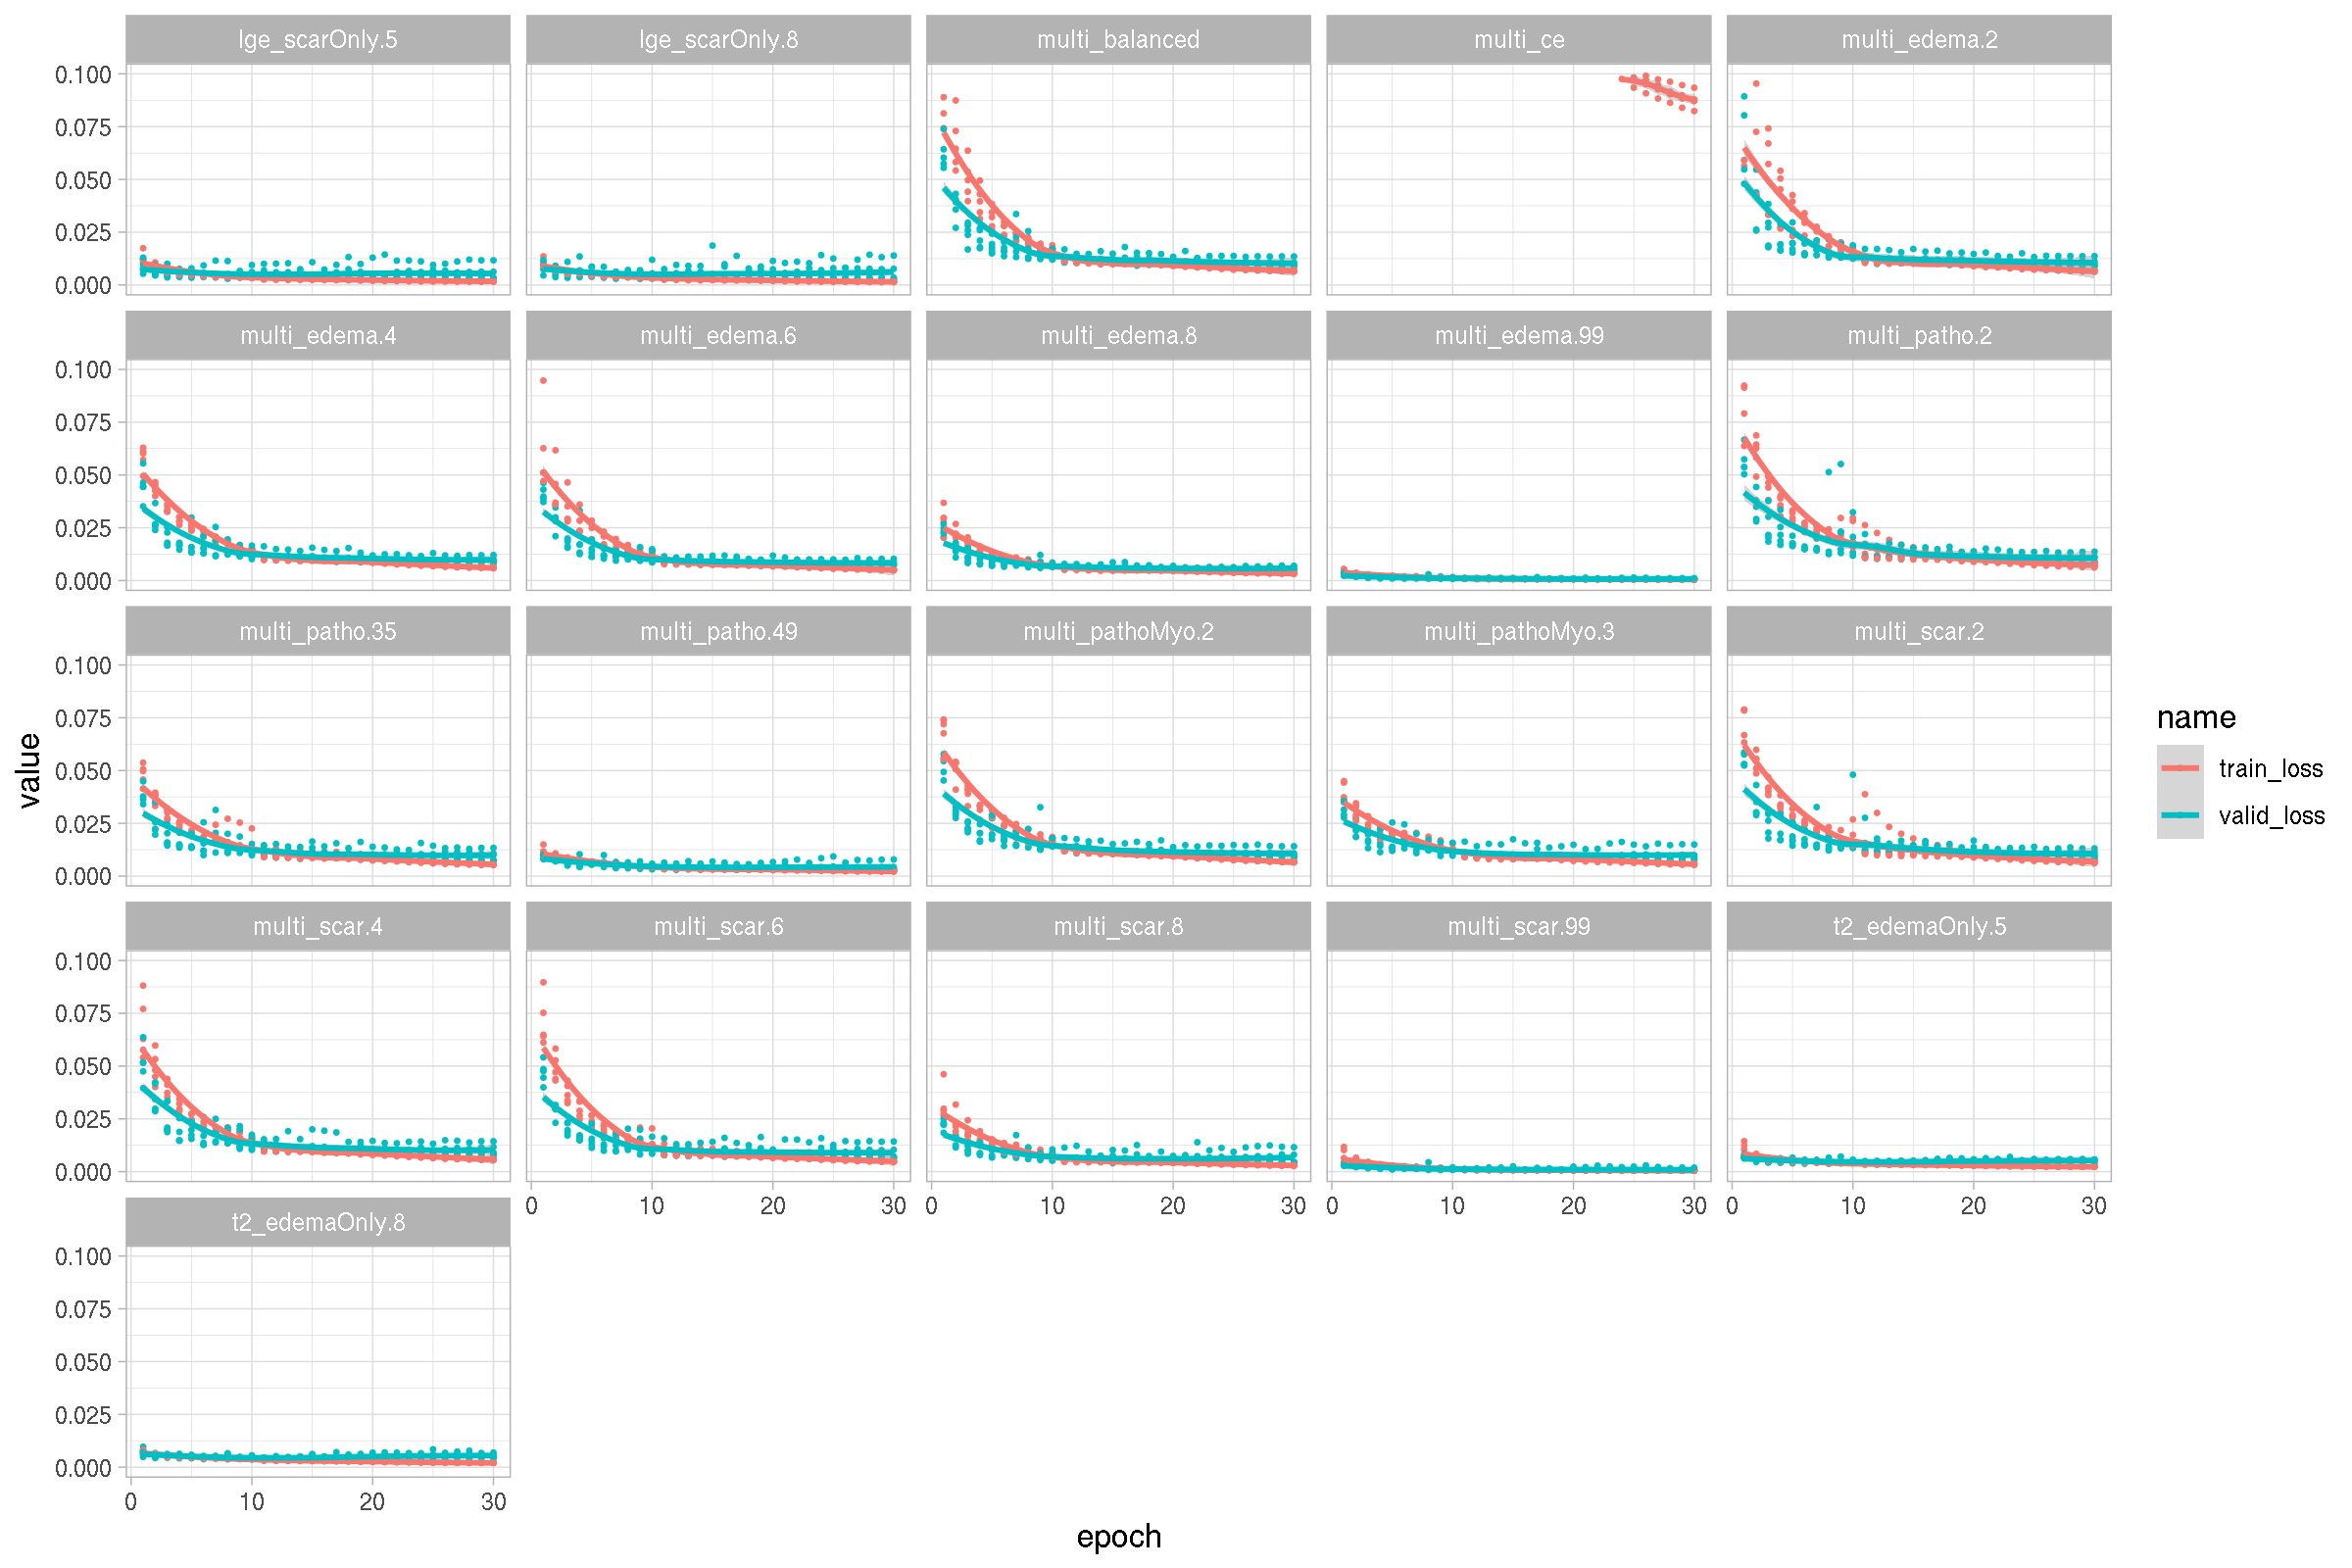

In [9]:
data %>%
    pivot_longer(contains("loss")) %>%
    #filter(focus != "ce", startsWith(run, "multi")) %>%
    ggplot(aes(epoch, value, color=name))+ #, shape=cv)) +
        geom_point(size=.5) +
        geom_smooth() +
        facet_wrap(.~run) +
        ylim(0,.1)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2400 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2400 rows containing missing values (geom_point).”


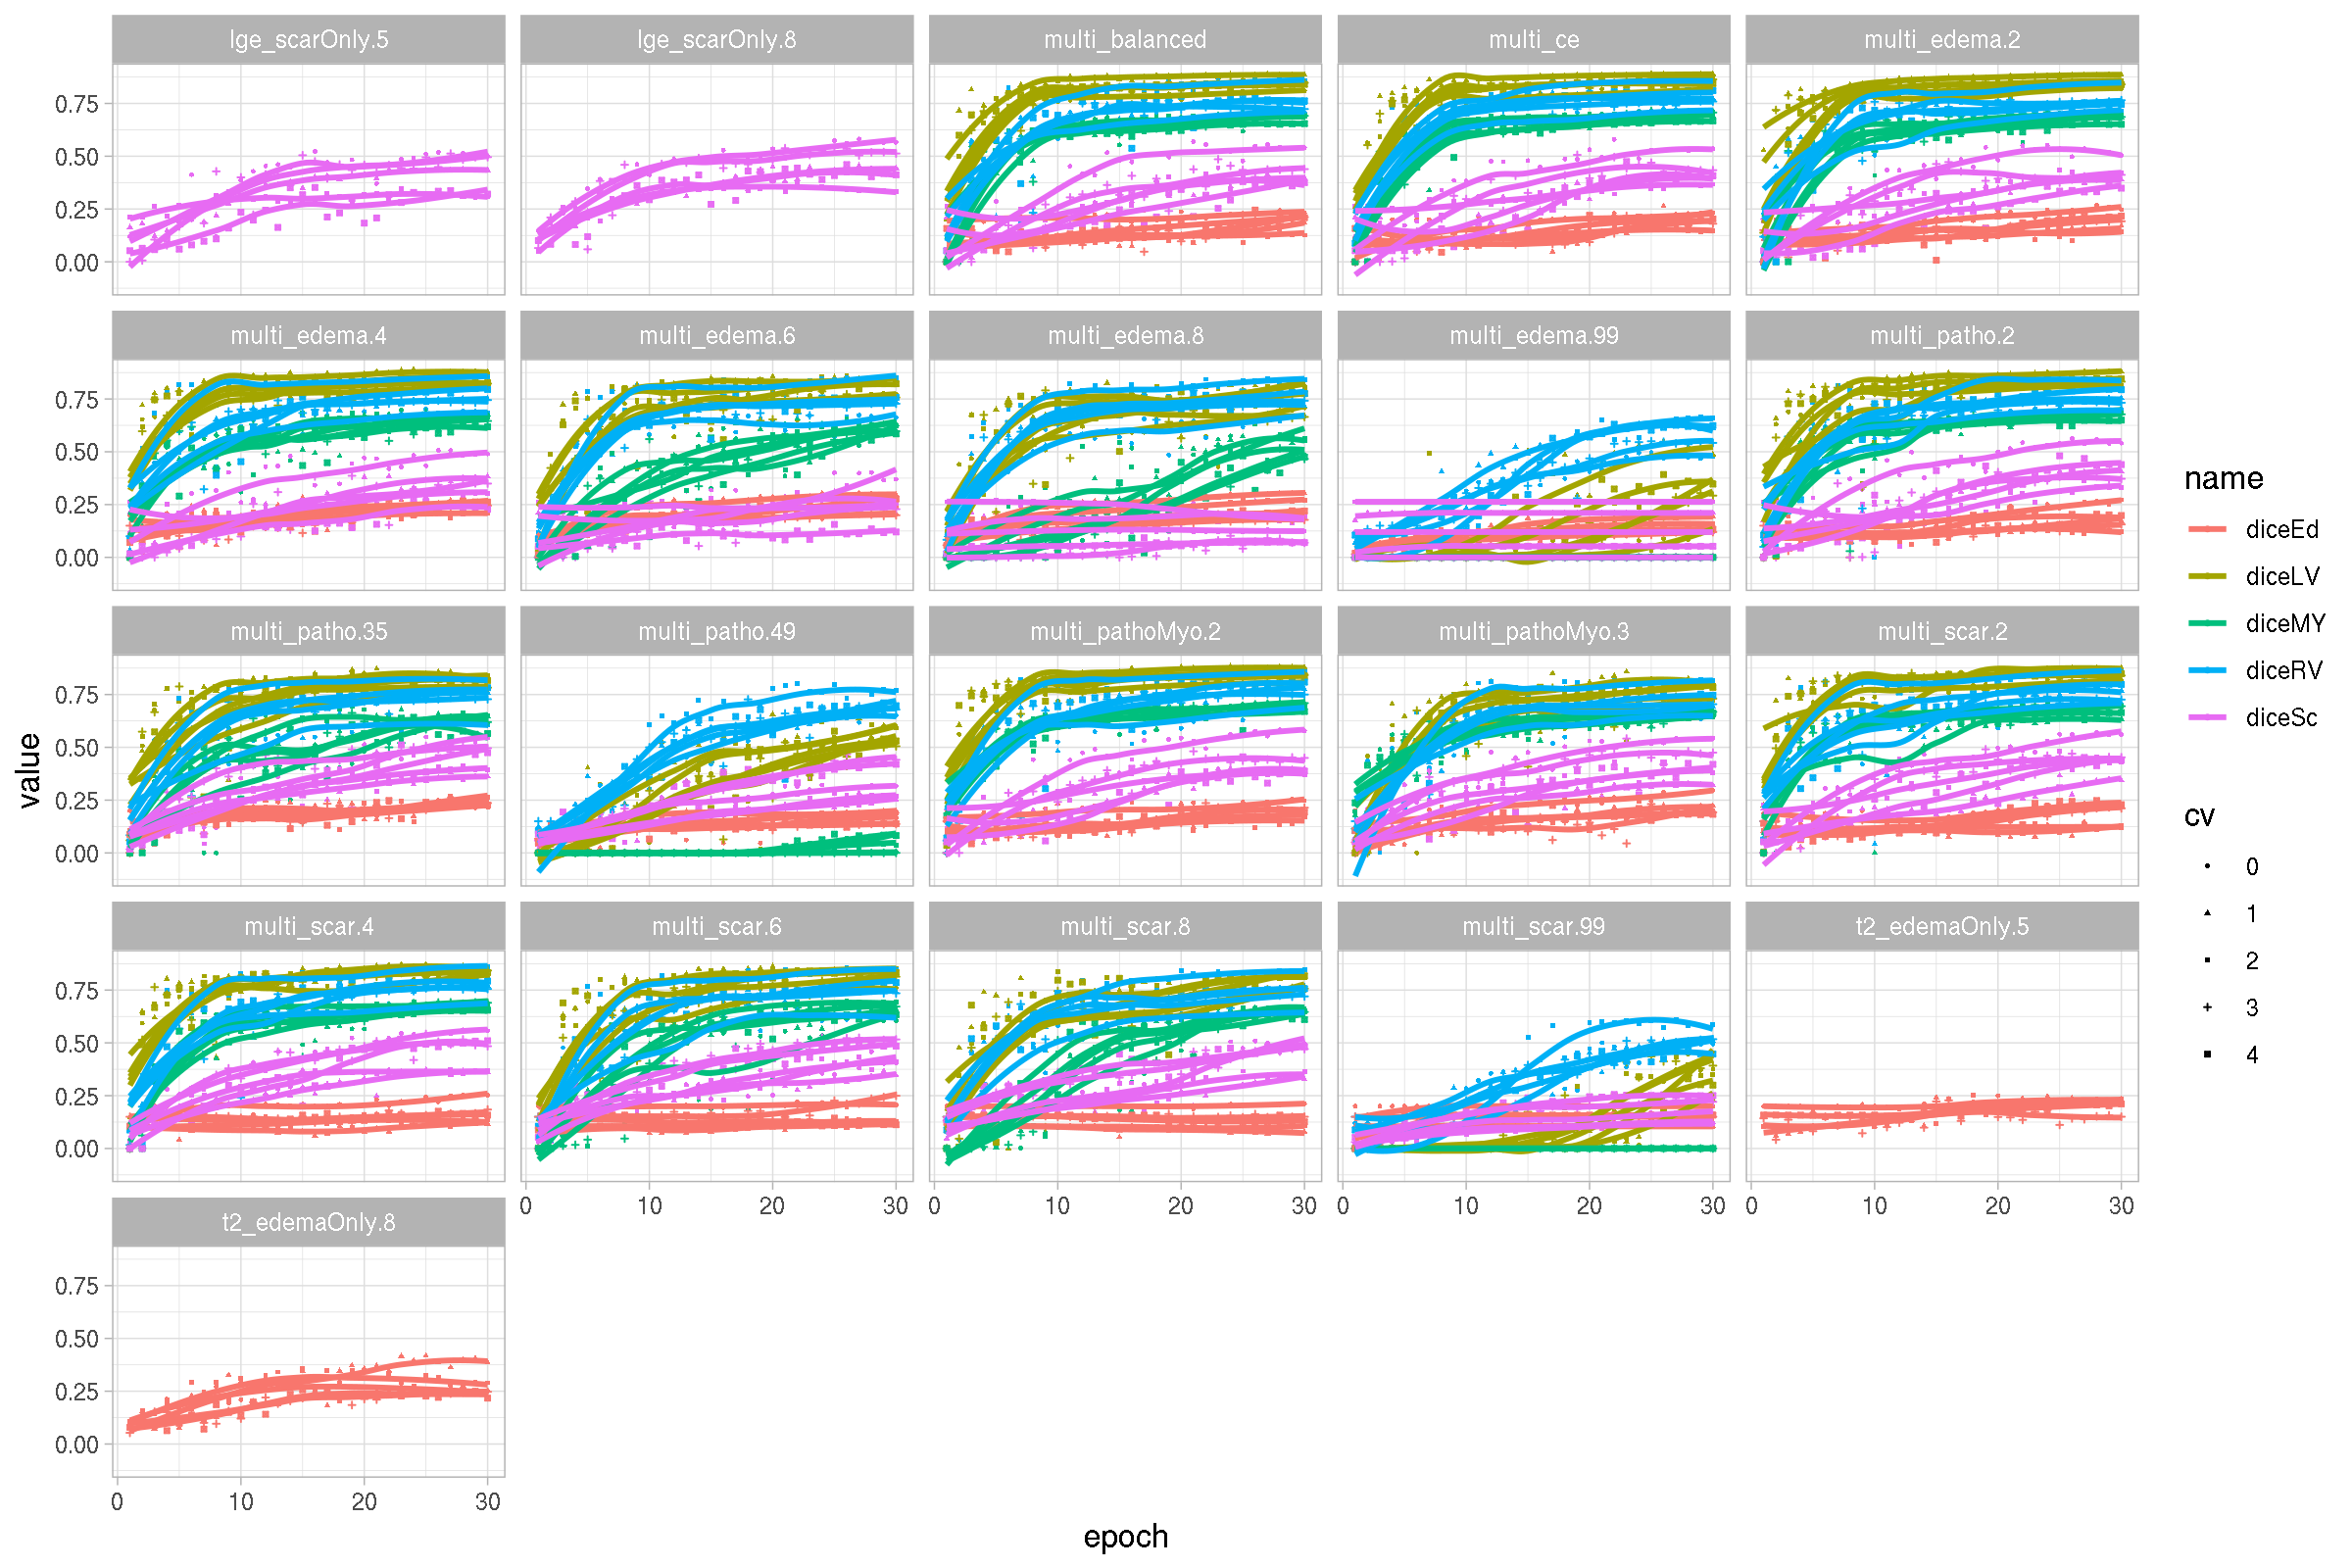

In [10]:
data %>%
    pivot_longer(contains("dice")) %>%
    #filter(focus != "ce", startsWith(run, "multi")) %>%
    ggplot(aes(epoch, value, color=name, shape=cv))+ #, shape=cv)) +
        geom_point(size=.5) +
        geom_smooth(se=FALSE) +
        facet_wrap(.~run)

### Final performance table

In [11]:
perf <- data %>% filter(epoch==30) %>% group_by(`in`,focus,weight) %>% summarise(across(starts_with("dice"), ~ mean(.x, na.rm = TRUE)))
perf

`summarise()` regrouping output by 'in', 'focus' (override with `.groups` argument)



in    focus     weight diceLV    diceMY     diceRV    diceEd    diceSc   
1  lge   scarOnly  5            NaN        NaN       NaN       NaN 0.4113498
2  lge   scarOnly  8            NaN        NaN       NaN       NaN 0.4529517
3  multi balanced  NA     0.8472374 0.68487955 0.7606308 0.1924807 0.4261342
4  multi ce        NA     0.8552887 0.69591962 0.7826109 0.1924488 0.4285691
5  multi edema     2      0.8476575 0.68188788 0.7658583 0.1935602 0.4146123
6  multi edema     4      0.8382191 0.65359944 0.7662371 0.2475796 0.3503787
7  multi edema     6      0.8069831 0.60649825 0.7465921 0.2433589 0.2501248
8  multi edema     8      0.7536457 0.50884939 0.7481146 0.2343428 0.1286620
9  multi edema     99     0.3217337 0.00000000 0.5824268 0.1465230 0.1292632
10 multi patho     2      0.8426679 0.67585491 0.7646106 0.1839383 0.4177773
11 multi patho     35     0.8090096 0.61940503 0.7380192 0.2369942 0.4537339
12 multi patho     49     0.5492239 0.03962845 0.6978247 0.1654627 0.3393397
13 multi pathoMyo  2      0.8462957 0.69152088 0.7742878 0.1987140 0.4373646
14 multi pathoMyo  3      0.7664072 0.65932462 0.7218119 0.2188349 0.4274810
15 multi scar      2      0.8465781 0.67608562 0.7711654 0.1814547 0.4454481
16 multi scar      4      0.8396950 0.67360096 0.7721655 0.1690721 0.4562239
17 multi scar      6      0.8192314 0.65220462 0.7467048 0.1618284 0.4321577
18 multi scar      8      0.7890620 0.64206444 0.7463965 0.1346176 0.4278879
19 multi scar      99     0.3295913 0.00000000 0.5105173 0.1436842 0.1761693
20 t2    edemaOnly 5            NaN        NaN       NaN 0.2099299       NaN
21 t2    edemaOnly 8            NaN        NaN       NaN 0.2781048       NaN

In [12]:
print("Edema")
perf %>% arrange(desc(diceEd)) %>% head(2)
perf %>% arrange(desc(diceSc)) %>% head(3)
perf %>% arrange(desc(diceLV)) %>% head(1)
perf %>% arrange(desc(diceRV)) %>% head(1)
perf %>% arrange(desc(diceMY)) %>% head(1)

[1] "Edema"


in    focus     weight diceLV    diceMY    diceRV    diceEd    diceSc   
1 t2    edemaOnly 8            NaN       NaN       NaN 0.2781048       NaN
2 multi edema     4      0.8382191 0.6535994 0.7662371 0.2475796 0.3503787

in    focus    weight diceLV    diceMY   diceRV    diceEd    diceSc   
1 multi scar     4      0.8396950 0.673601 0.7721655 0.1690721 0.4562239
2 multi patho    35     0.8090096 0.619405 0.7380192 0.2369942 0.4537339
3 lge   scarOnly 8            NaN      NaN       NaN       NaN 0.4529517

in    focus weight diceLV    diceMY    diceRV    diceEd    diceSc   
1 multi ce    NA     0.8552887 0.6959196 0.7826109 0.1924488 0.4285691

in    focus weight diceLV    diceMY    diceRV    diceEd    diceSc   
1 multi ce    NA     0.8552887 0.6959196 0.7826109 0.1924488 0.4285691

in    focus weight diceLV    diceMY    diceRV    diceEd    diceSc   
1 multi ce    NA     0.8552887 0.6959196 0.7826109 0.1924488 0.4285691

In [45]:
perf %>% mutate(multidice = (diceEd+diceSc)/2) %>% arrange(desc(multidice)) %>% head(1)

in    focus weight diceLV    diceMY   diceRV    diceEd    diceSc    multidice
1 multi patho 35     0.8090096 0.619405 0.7380192 0.2369942 0.4537339 0.3453641

In [57]:
perf %>%
    mutate(meanDiceScEd = (diceEd+diceSc)/2) %>%
    arrange(desc(meanDiceScEd)) %>%
    ungroup %>%
    mutate_if(is.numeric,round,3) %>%
    mutate_if(is.numeric,`*`,100) %>%
    filter(focus=="ce" | weight %in% c(35,4) | (weight==8 & str_detect(focus, "Only")))

in    focus     weight diceLV diceMY diceRV diceEd diceSc meanDiceScEd
1 multi patho     35     80.9   61.9   73.8   23.7   45.4   34.5        
2 multi scar      4      84.0   67.4   77.2   16.9   45.6   31.3        
3 multi ce        NA     85.5   69.6   78.3   19.2   42.9   31.1        
4 multi edema     4      83.8   65.4   76.6   24.8   35.0   29.9        
5 lge   scarOnly  8       NaN    NaN    NaN    NaN   45.3    NaN        
6 t2    edemaOnly 8       NaN    NaN    NaN   27.8    NaN    NaN

Warning message:
“Removed 80 rows containing missing values (geom_point).”


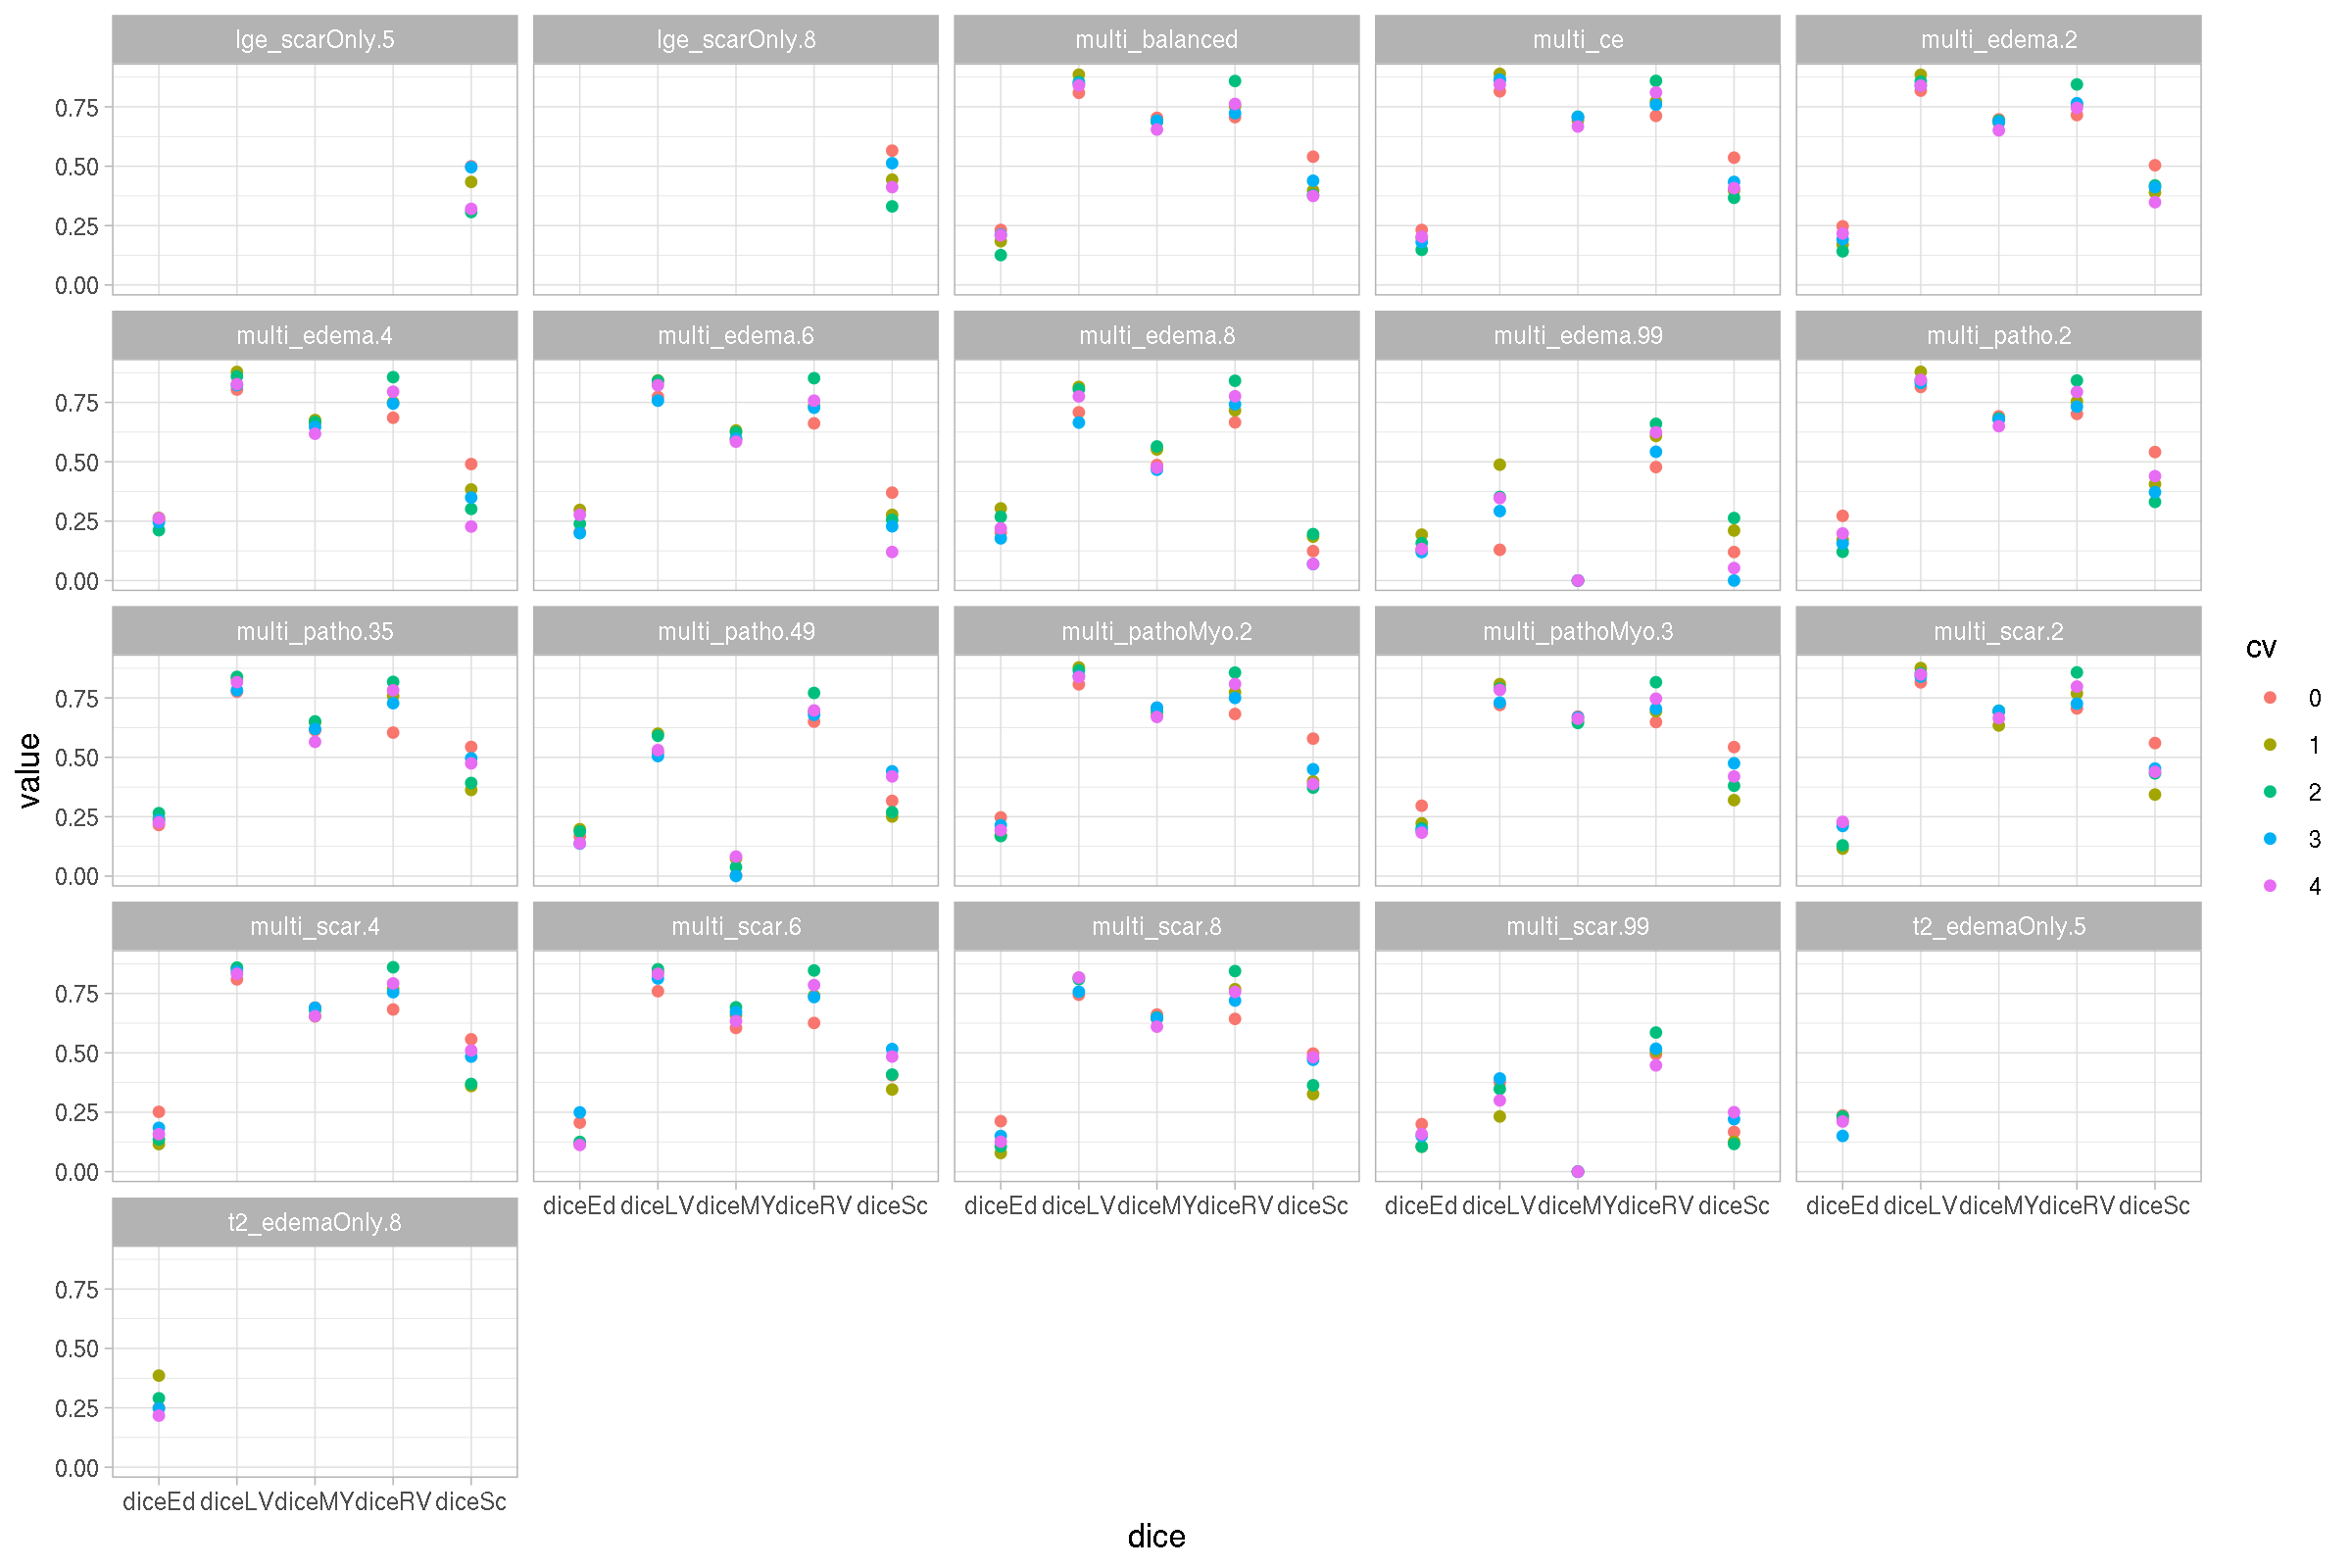

In [14]:
data %>%
    filter(epoch==30) %>%
    pivot_longer(starts_with("dice"), "dice", "score") %>%
    ggplot(aes(dice,value,color=cv)) +
        geom_point() +
        facet_wrap(run~.)

### Compare model performance on Edema and Scar

Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”


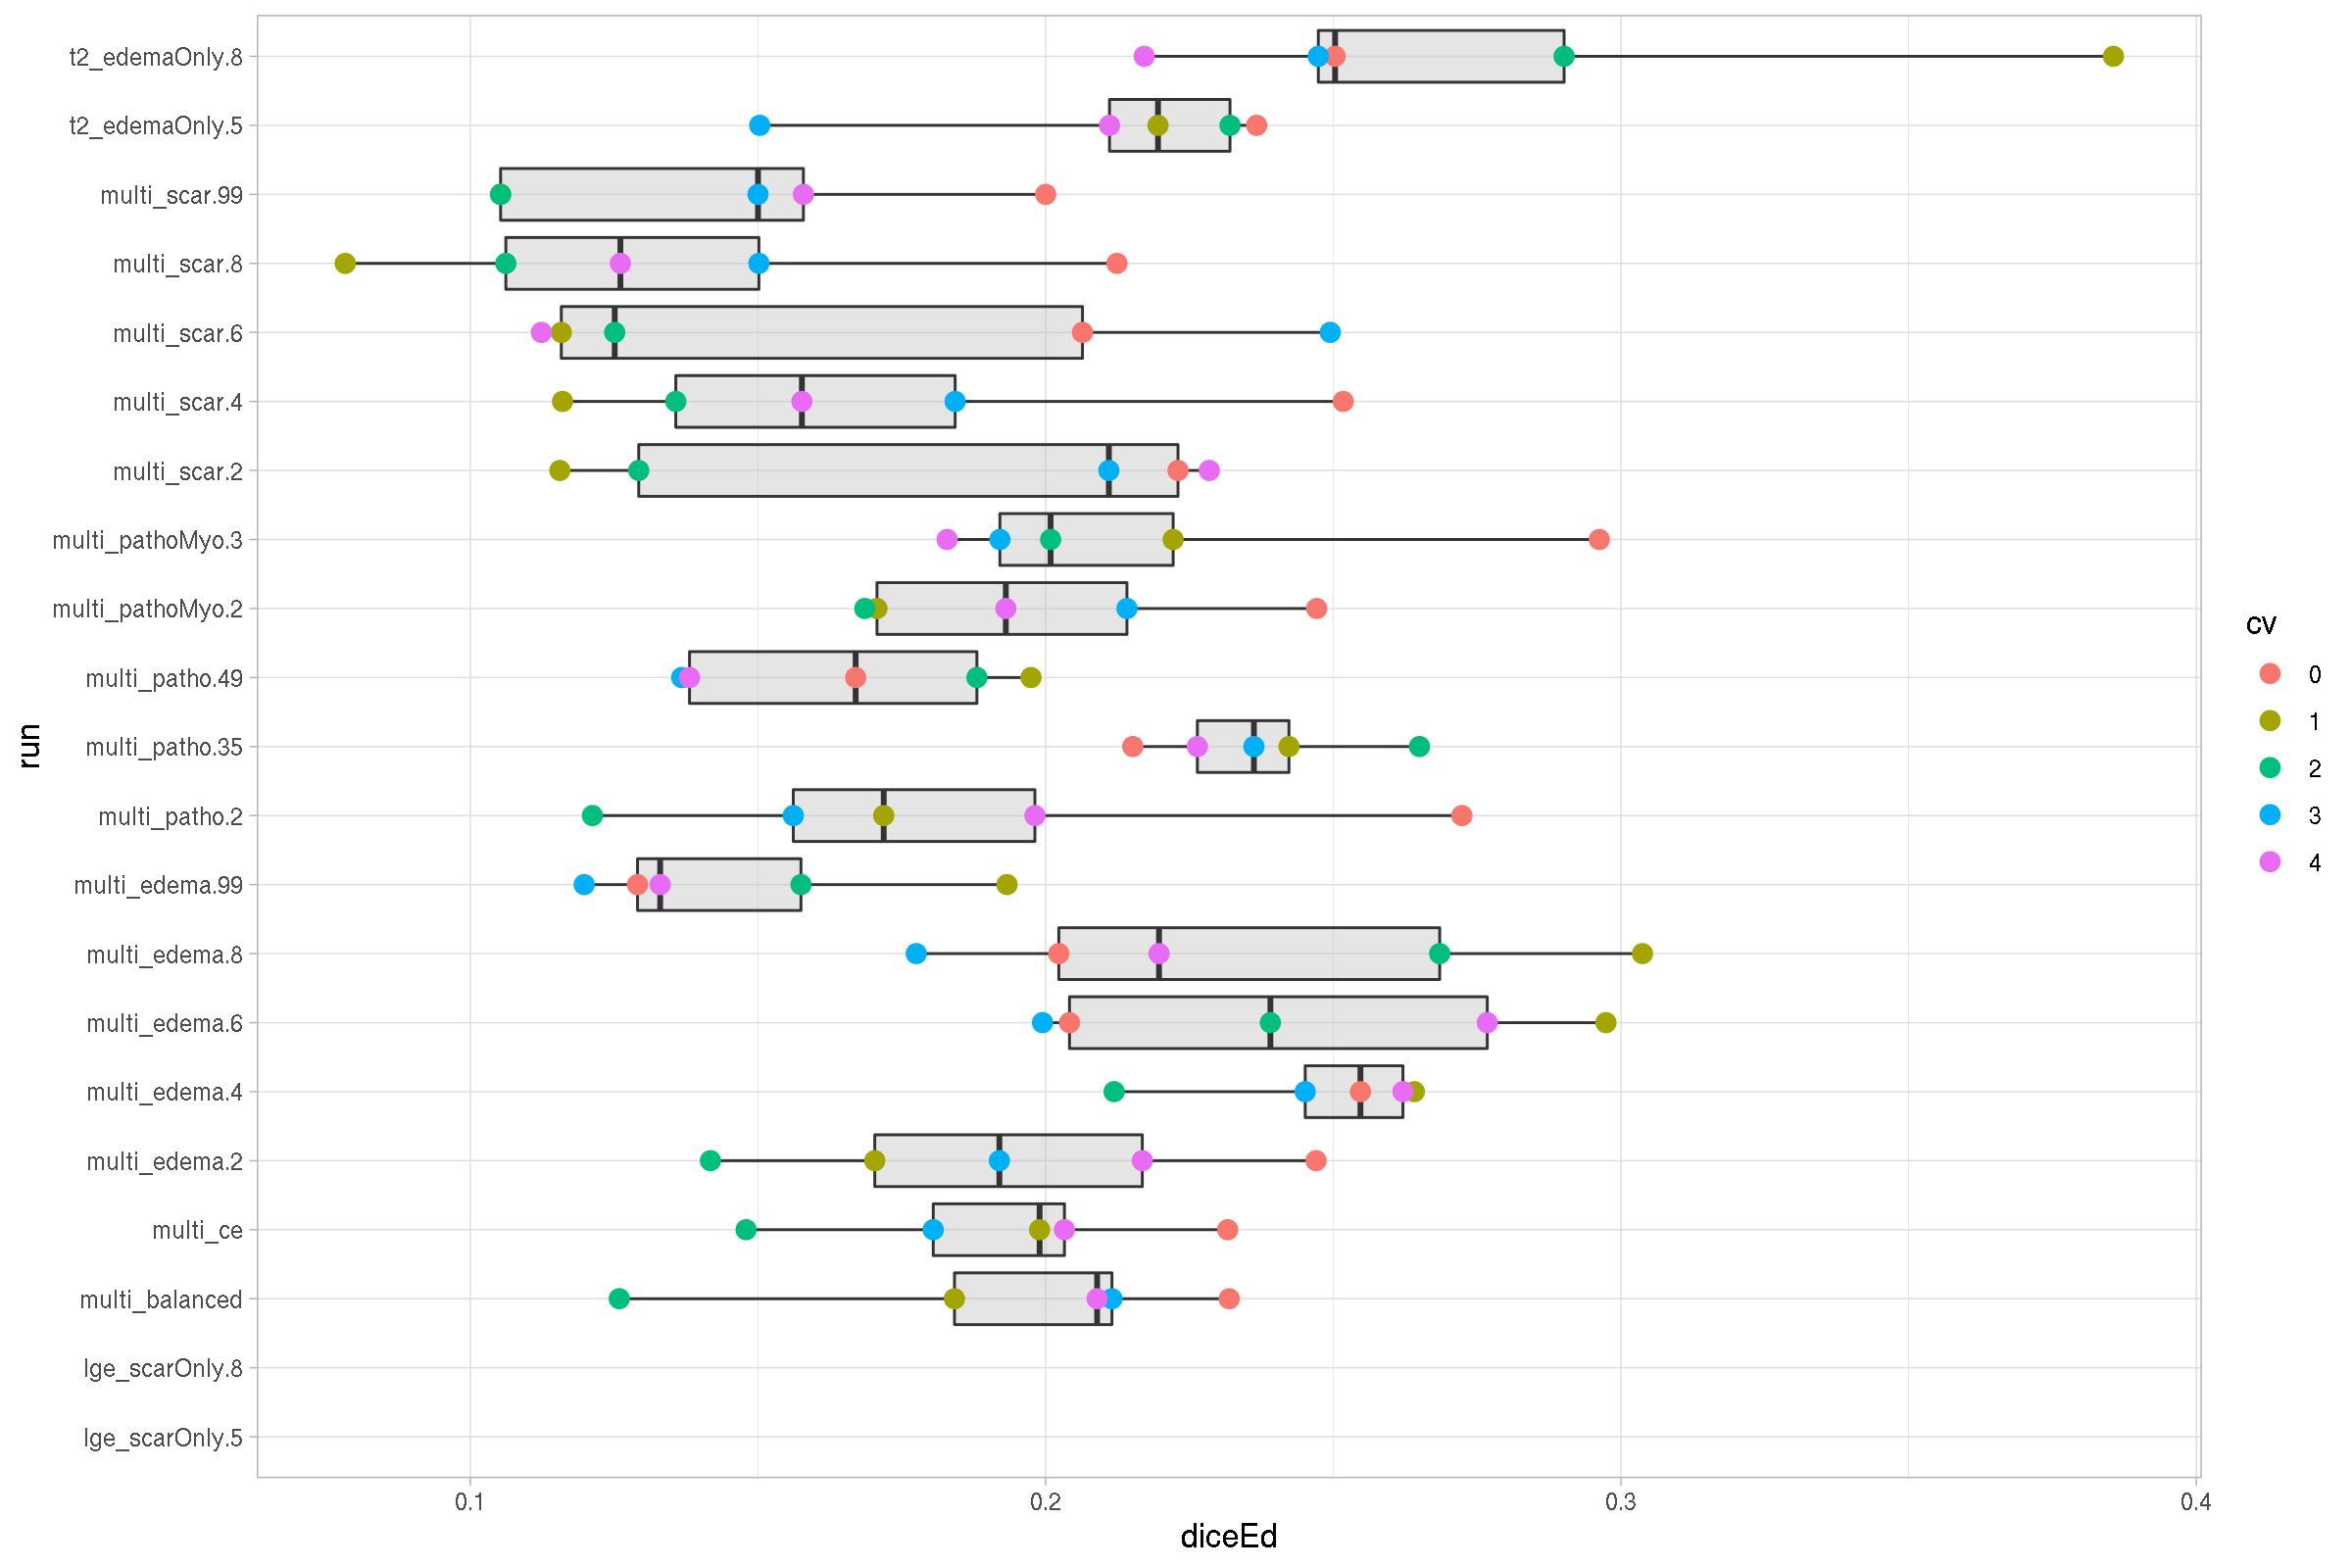

In [60]:
data %>%
    mutate(edema = str_detect(run,"edema")) %>%
    filter(epoch==30) %>%
    ggplot(aes(run,diceEd)) +
        #geom_boxplot(aes(fill=edema), alpha=.2, coef=Inf) +
        geom_boxplot(fill="gray",alpha=.4, coef=Inf) +
        geom_point(aes(color=cv), size=3) +
        coord_flip()

In [61]:
ggsave("../docs/figures/dice_edema.svg")

Saving 6.67 x 6.67 in image

Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”


Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”


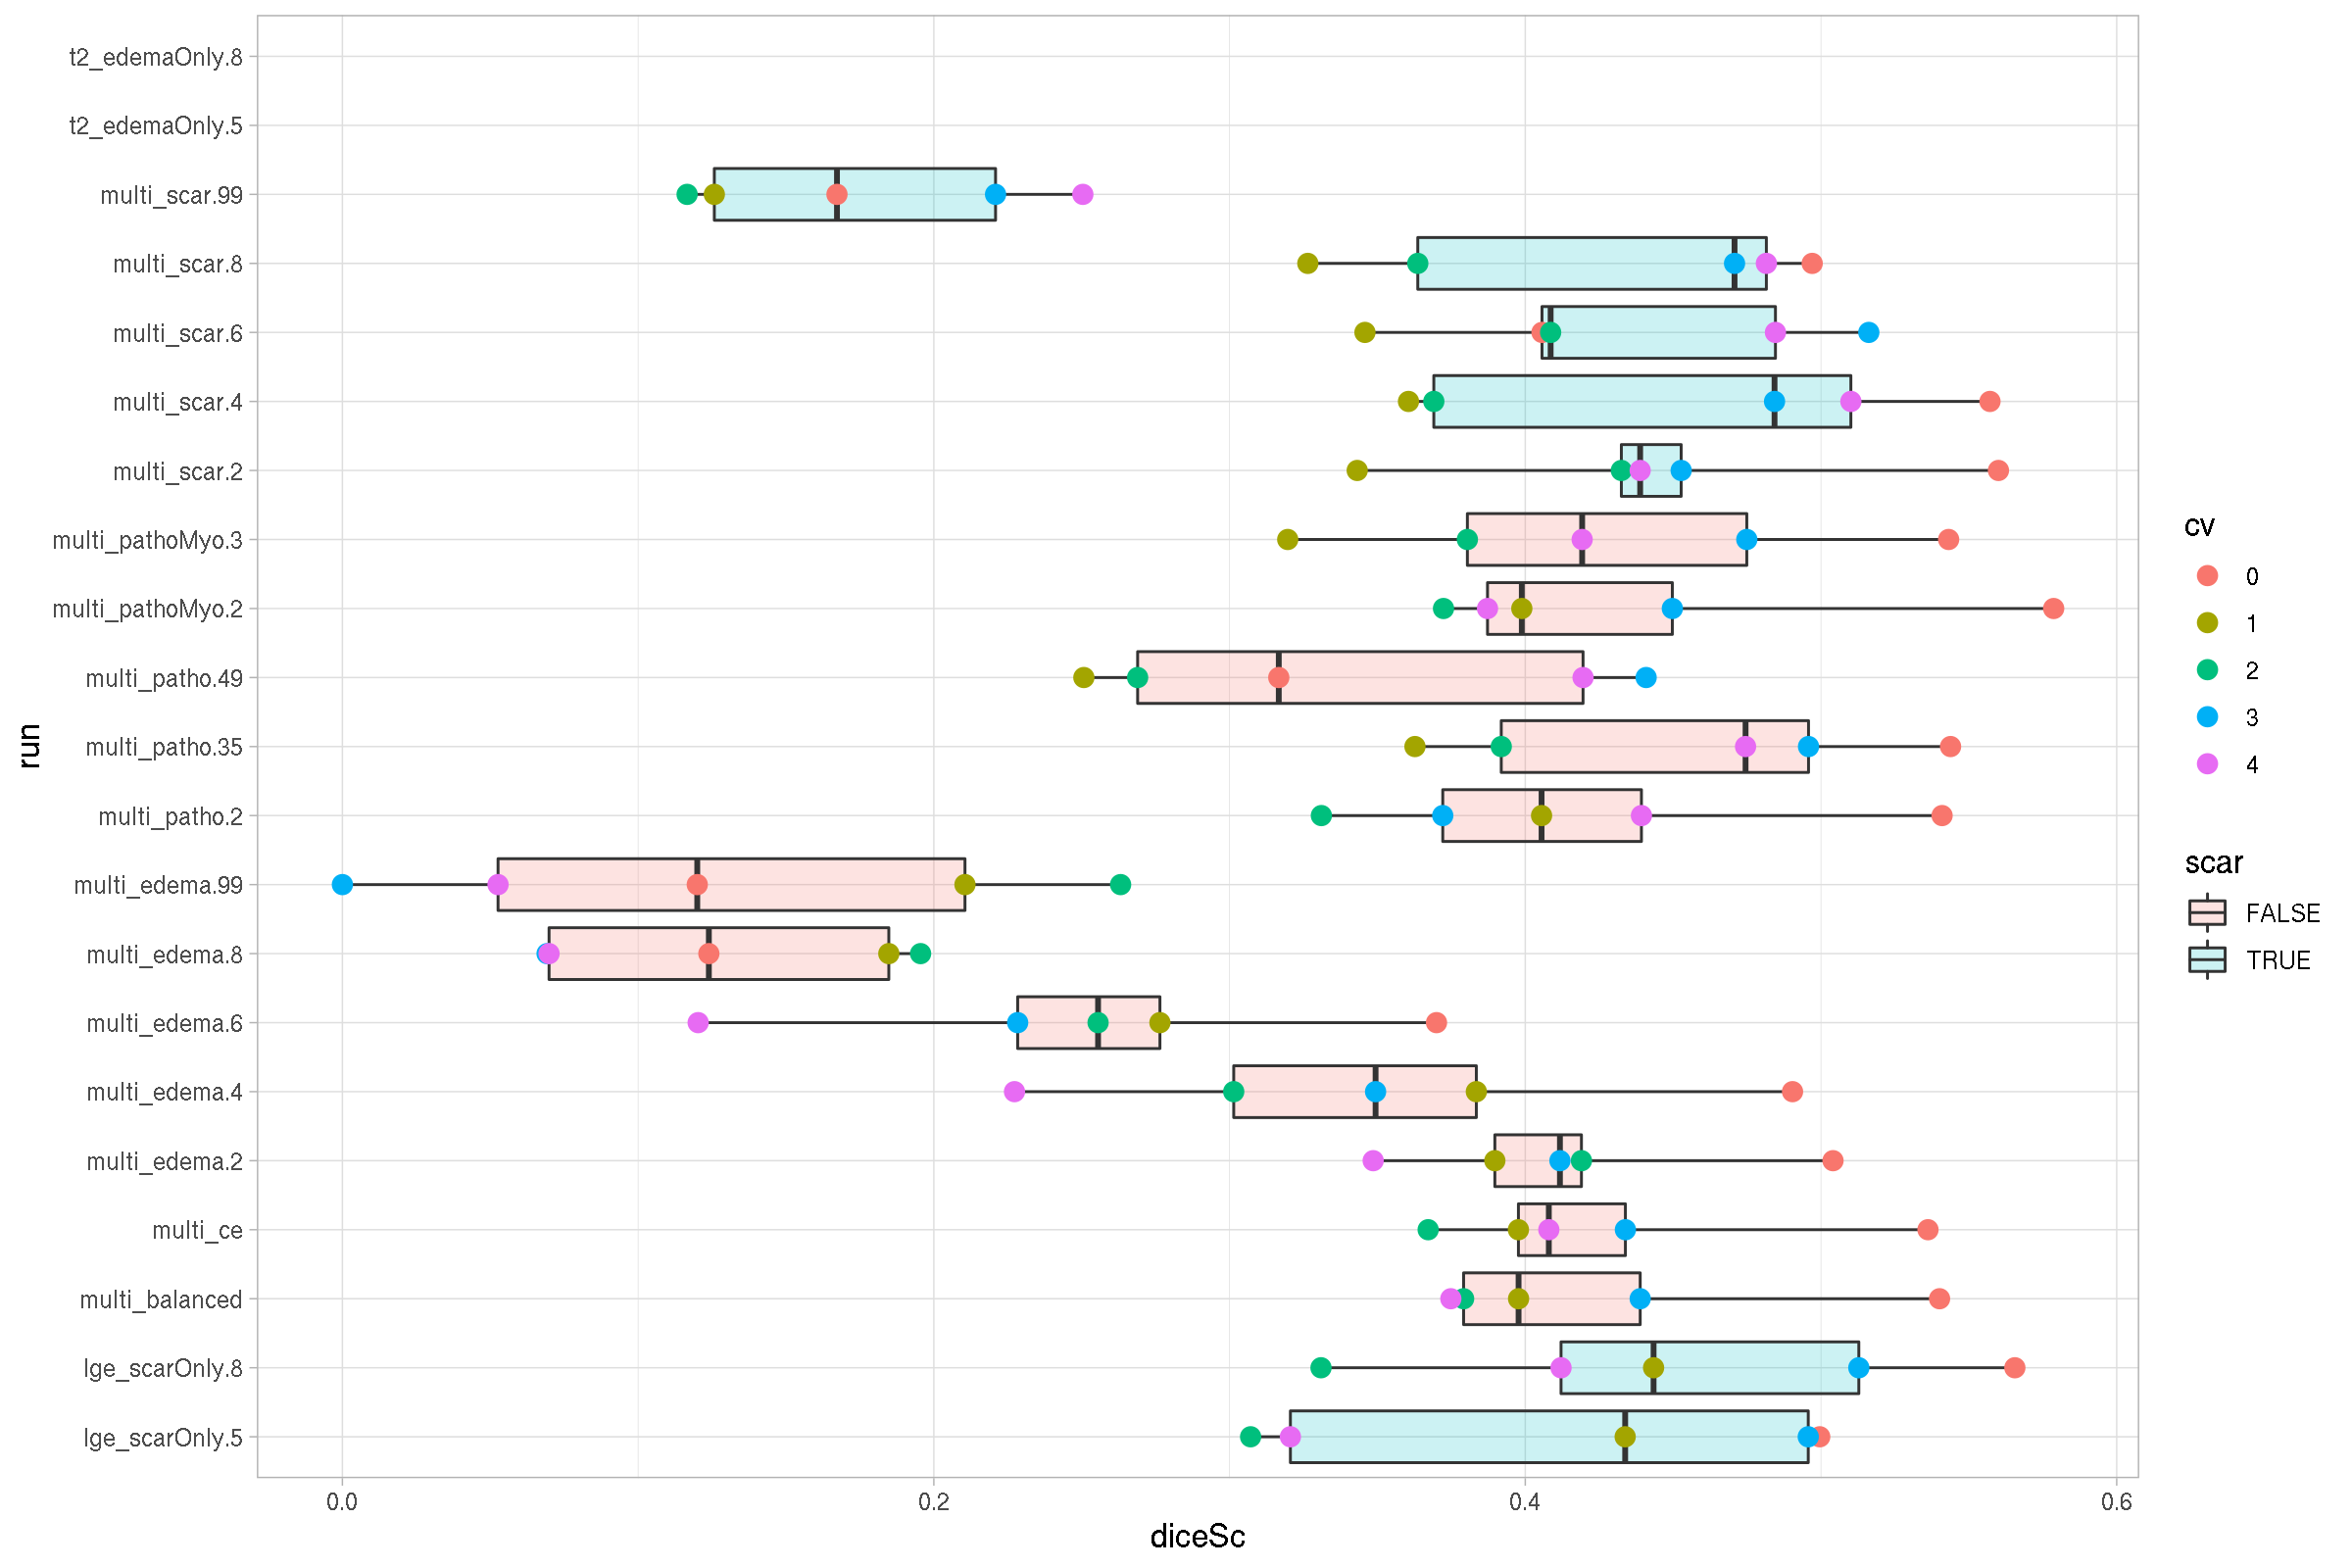

In [16]:
data %>%
    filter(epoch==30) %>%
    mutate(scar = str_detect(run,"scar")) %>%
    ggplot(aes(run,diceSc)) +
        geom_boxplot(aes(fill=scar), alpha=.2, coef=Inf) +
        geom_point(aes(color=cv),size=3) +
        coord_flip()

Warning message:
“Removed 20 rows containing non-finite values (stat_boxplot).”


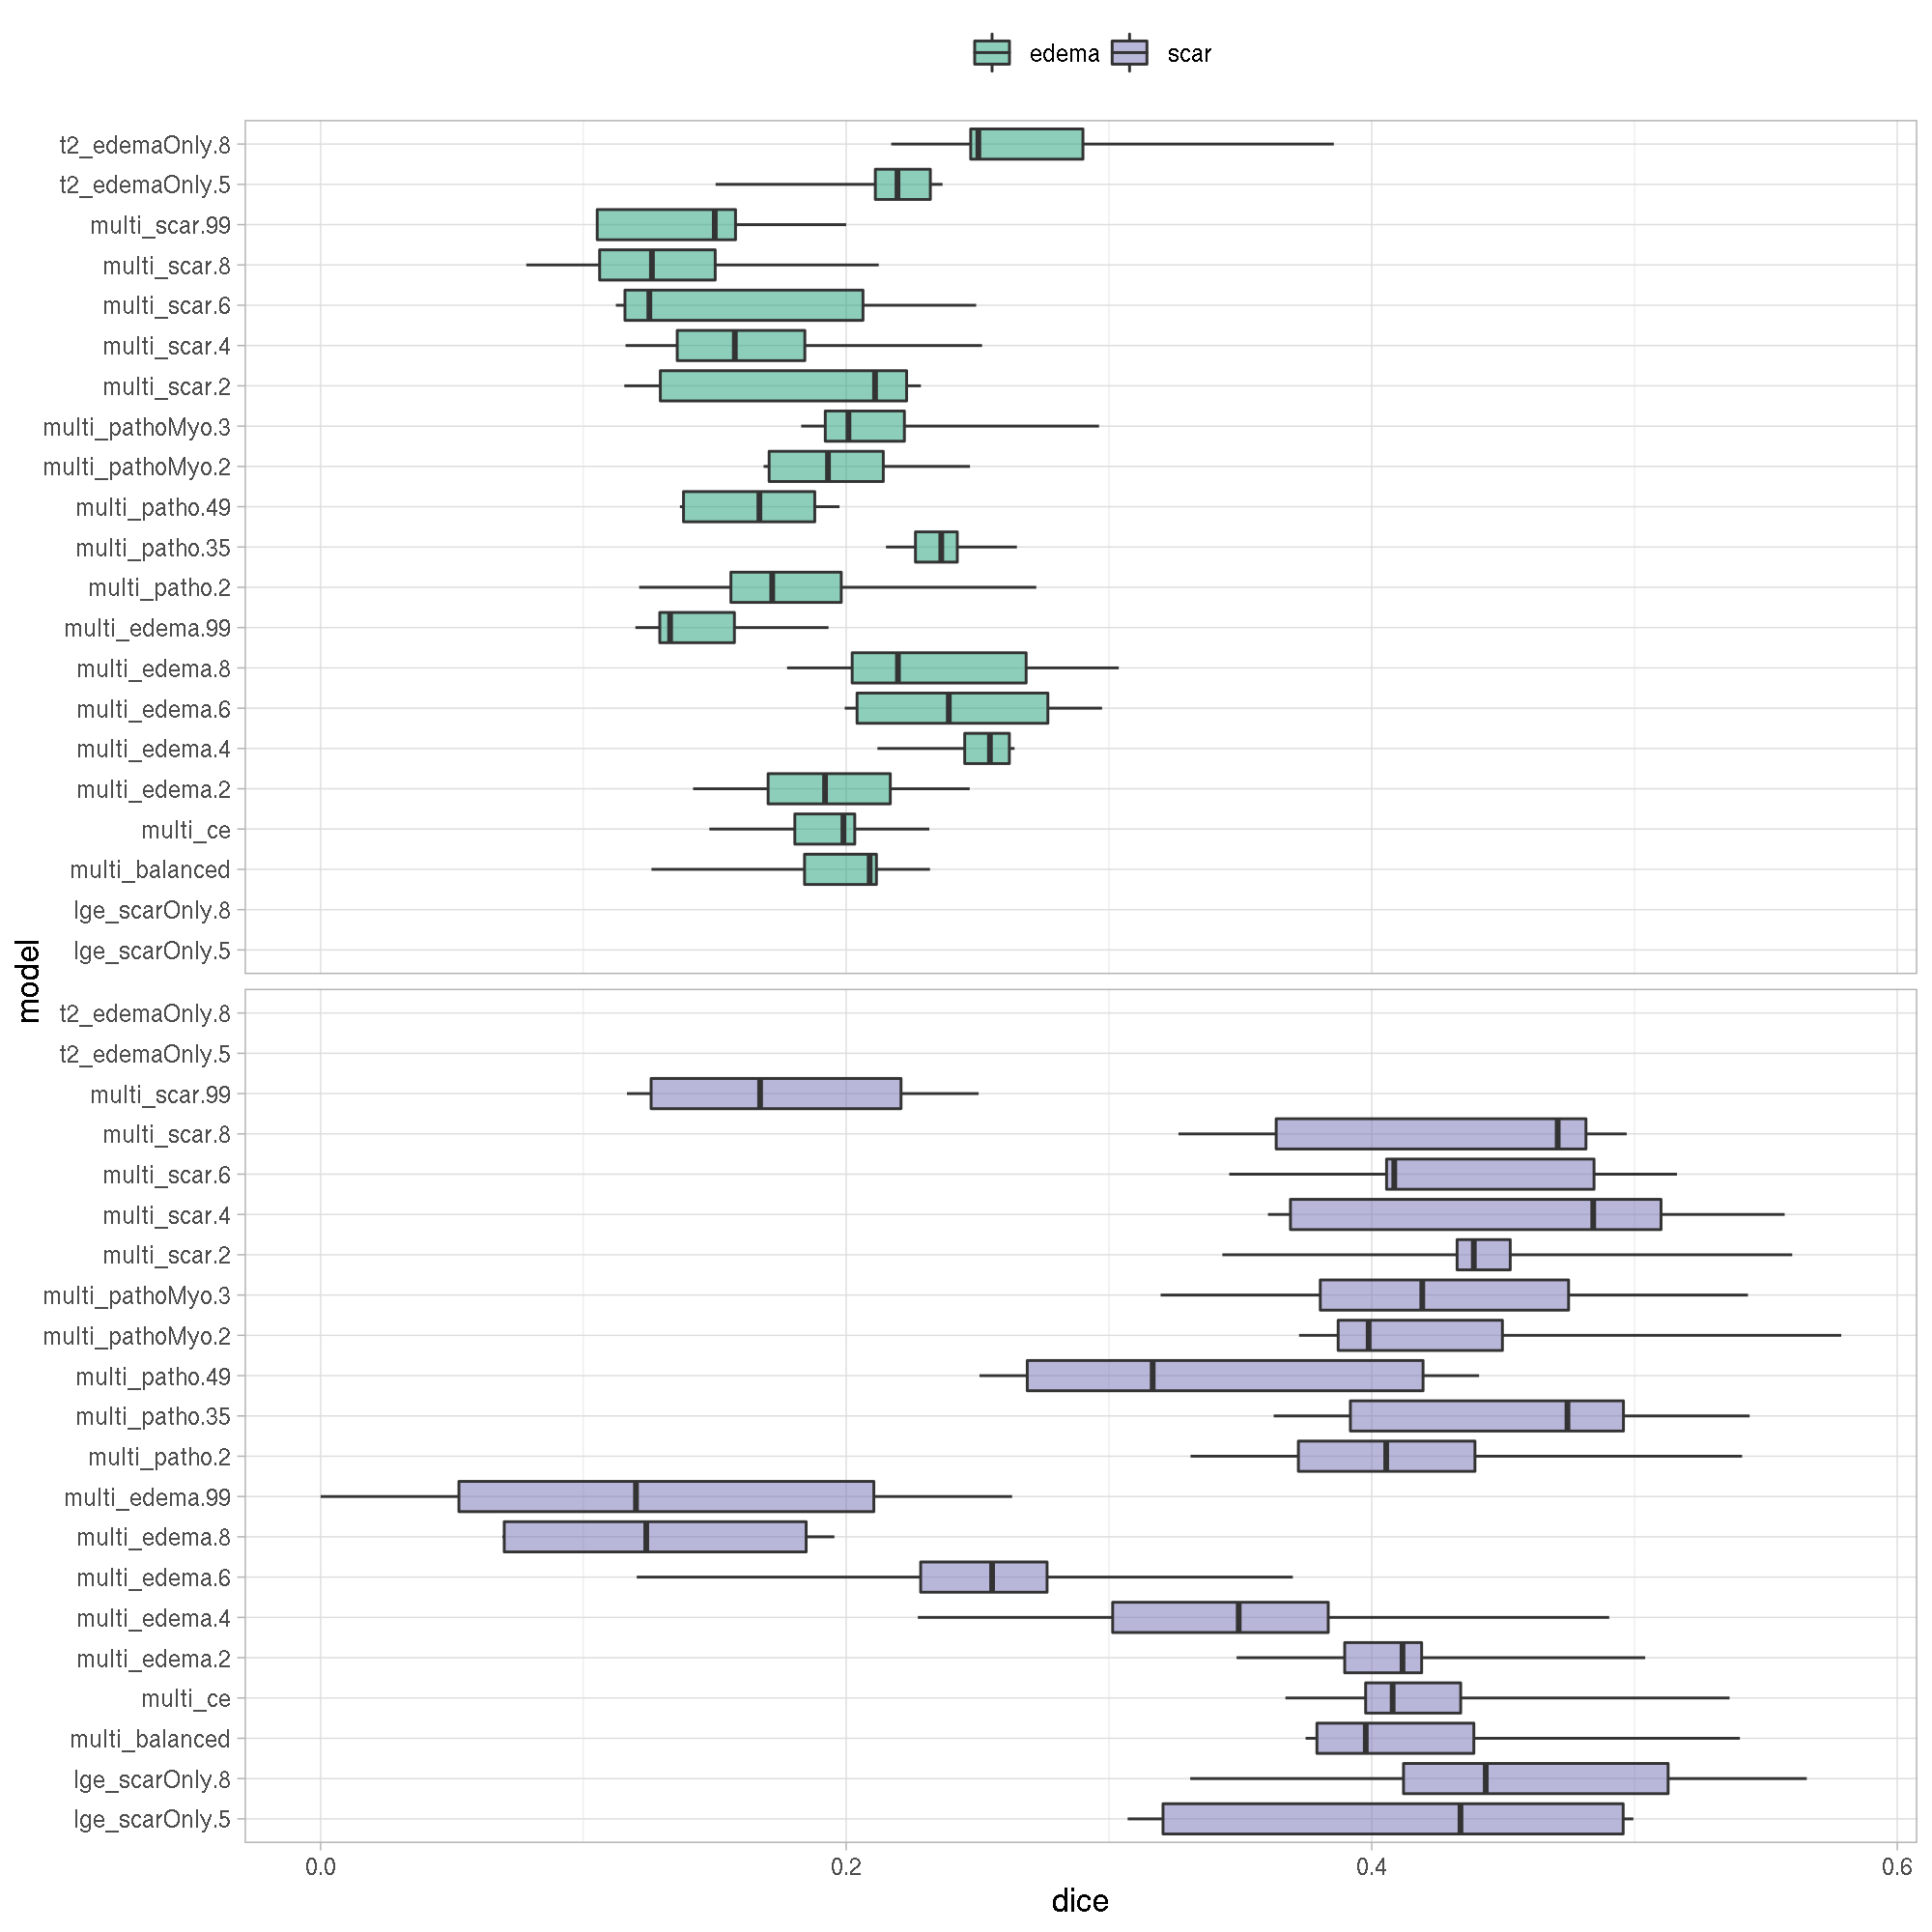

In [114]:
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res=250)
data %>%
    filter(epoch==30) %>%
    rename(edema=diceEd, scar=diceSc, model=run) %>%
    gather("patho","dice",edema,scar) %>%
    ggplot(aes(model,dice,fill=patho)) +
        geom_boxplot(alpha=.5, coef=Inf, ) +
        #geom_point(aes(color=cv),size=2) +
        coord_flip() +
        facet_grid(patho ~ .) +
        theme(legend.position = "top", ) +
        theme(strip.background = element_blank(), strip.text = element_blank()) +
        scale_fill_manual(values = c("#1b9e77", "#7570b3")) +
        labs(fill = NULL)
options(repr.plot.width=12, repr.plot.height=8, repr.plot.res=200)

In [103]:
?scale_fill_brewer

Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
“cannot open compressed file '/home/ankenbrand/miniconda3/envs/fastai/lib/R/library/blob/DESCRIPTION', probable reason 'No such file or directory'”
Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
“cannot open compressed file '/home/ankenbrand/miniconda3/envs/fastai/lib/R/library/Matrix/DESCRIPTION', probable reason 'No such file or directory'”
Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
“cannot open compressed file '/home/ankenbrand/miniconda3/envs/fastai/lib/R/library/mgcv/DESCRIPTION', probable reason 'No such file or directory'”
Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
“cannot open compressed file '/home/ankenbrand/miniconda3/envs/fastai/lib/R/library/lifecycle/DESCRIPTION', probable reason 'No such file or directory'”
Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package",

scale_colour_brewer          package:ggplot2           R Documentation

_S_e_q_u_e_n_t_i_a_l, _d_i_v_e_r_g_i_n_g _a_n_d _q_u_a_l_i_t_a_t_i_v_e _c_o_l_o_u_r _s_c_a_l_e_s _f_r_o_m
_c_o_l_o_r_b_r_e_w_e_r._o_r_g

_D_e_s_c_r_i_p_t_i_o_n:

     The ‘brewer’ scales provides sequential, diverging and qualitative
     colour schemes from ColorBrewer. These are particularly well
     suited to display discrete values on a map. See <URL:
     http://colorbrewer2.org> for more information.

_U_s_a_g_e:

     scale_colour_brewer(..., type = "seq", palette = 1, direction = 1)
     
     scale_fill_brewer(..., type = "seq", palette = 1, direction = 1)
     
     scale_colour_distiller(..., type = "seq", palette = 1, direction = -1,
       values = NULL, space = "Lab", na.value = "grey50",
       guide = "colourbar")
     
     scale_fill_distiller(..., type = "seq", palette = 1, direction = -1,
       values = NULL, space = "Lab", na.value = "grey50",
       guide = "colourbar")
     
_A_r_g_u_m_e_n_t_s:

     ...: Other arguments passed on to ‘discrete_scale’ to control
          name, limits, breaks, labels and so forth.

    type: One of seq (sequential), div (diverging) or qual
          (qualitative)

 palette: If a string, will use that named palette.  If a number, will
          index into the list of palettes of appropriate ‘type’

direction: Sets the order of colors in the scale. If 1, the default,
          colors are as output by ‘brewer.pal’. If -1, the order of
          colors is reversed.

  values: if colours should not be evenly positioned along the gradient
          this vector gives the position (between 0 and 1) for each
          colour in the ‘colours’ vector. See ‘rescale’ for a convience
          function to map an arbitrary range to between 0 and 1.

   space: colour space in which to calculate gradient. Must be "Lab" -
          other values are deprecated.

na.value: Colour to use for missing values

   guide: Type of legend. Use ‘"colourbar"’ for continuous colour bar,
          or ‘"legend"’ for discrete colour legend.

_D_e_t_a_i_l_s:

     The ‘brewer’ scales were carefully designed and tested on discrete
     data. They were not designed to be extended to continuous data,
     but results often look good. Your mileage may vary.

_P_a_l_e_t_t_e_s:

     The following palettes are available for use with these scales:

     Diverging BrBG, PiYG, PRGn, PuOr, RdBu, RdGy, RdYlBu, RdYlGn,
          Spectral

     Qualitative Accent, Dark2, Paired, Pastel1, Pastel2, Set1, Set2,
          Set3

     Sequential Blues, BuGn, BuPu, GnBu, Greens, Greys, Oranges, OrRd,
          PuBu, PuBuGn, PuRd, Purples, RdPu, Reds, YlGn, YlGnBu,
          YlOrBr, YlOrRd

_N_o_t_e:

     The ‘distiller’ scales extends brewer to continuous scales by
     smoothly interpolate 6 colours from any palette to a continuous
     scale.

_S_e_e _A_l_s_o:

     Other colour scales: ‘scale_alpha’, ‘scale_colour_gradient’,
     ‘scale_colour_grey’, ‘scale_colour_hue’

_E_x_a_m_p_l_e_s:

     dsamp <- diamonds[sample(nrow(diamonds), 1000), ]
     (d <- ggplot(dsamp, aes(carat, price)) +
       geom_point(aes(colour = clarity)))
     d + scale_colour_brewer()
     
     # Change scale label
     d + scale_colour_brewer("Diamond\nclarity")
     
     # Select brewer palette to use, see ?scales::brewer_pal for more details
     d + scale_colour_brewer(palette = "Greens")
     d + scale_colour_brewer(palette = "Set1")
     
     
     # scale_fill_brewer works just the same as
     # scale_colour_brewer but for fill colours
     p <- ggplot(diamonds, aes(x = price, fill = cut)) +
       geom_histogram(position = "dodge", binwidth = 1000)
     p + scale_fill_brewer()
     # the order of colour can be reversed
     p + scale_fill_brewer(direction = -1)
     # the brewer scales look better on a darker background
     p + scale_fill_bre

In [76]:
ggsave('../docs/figures/dice_edema_scar.svg')

Saving 6.67 x 6.67 in image

Warning message:
“Removed 20 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”


## Sonstiges

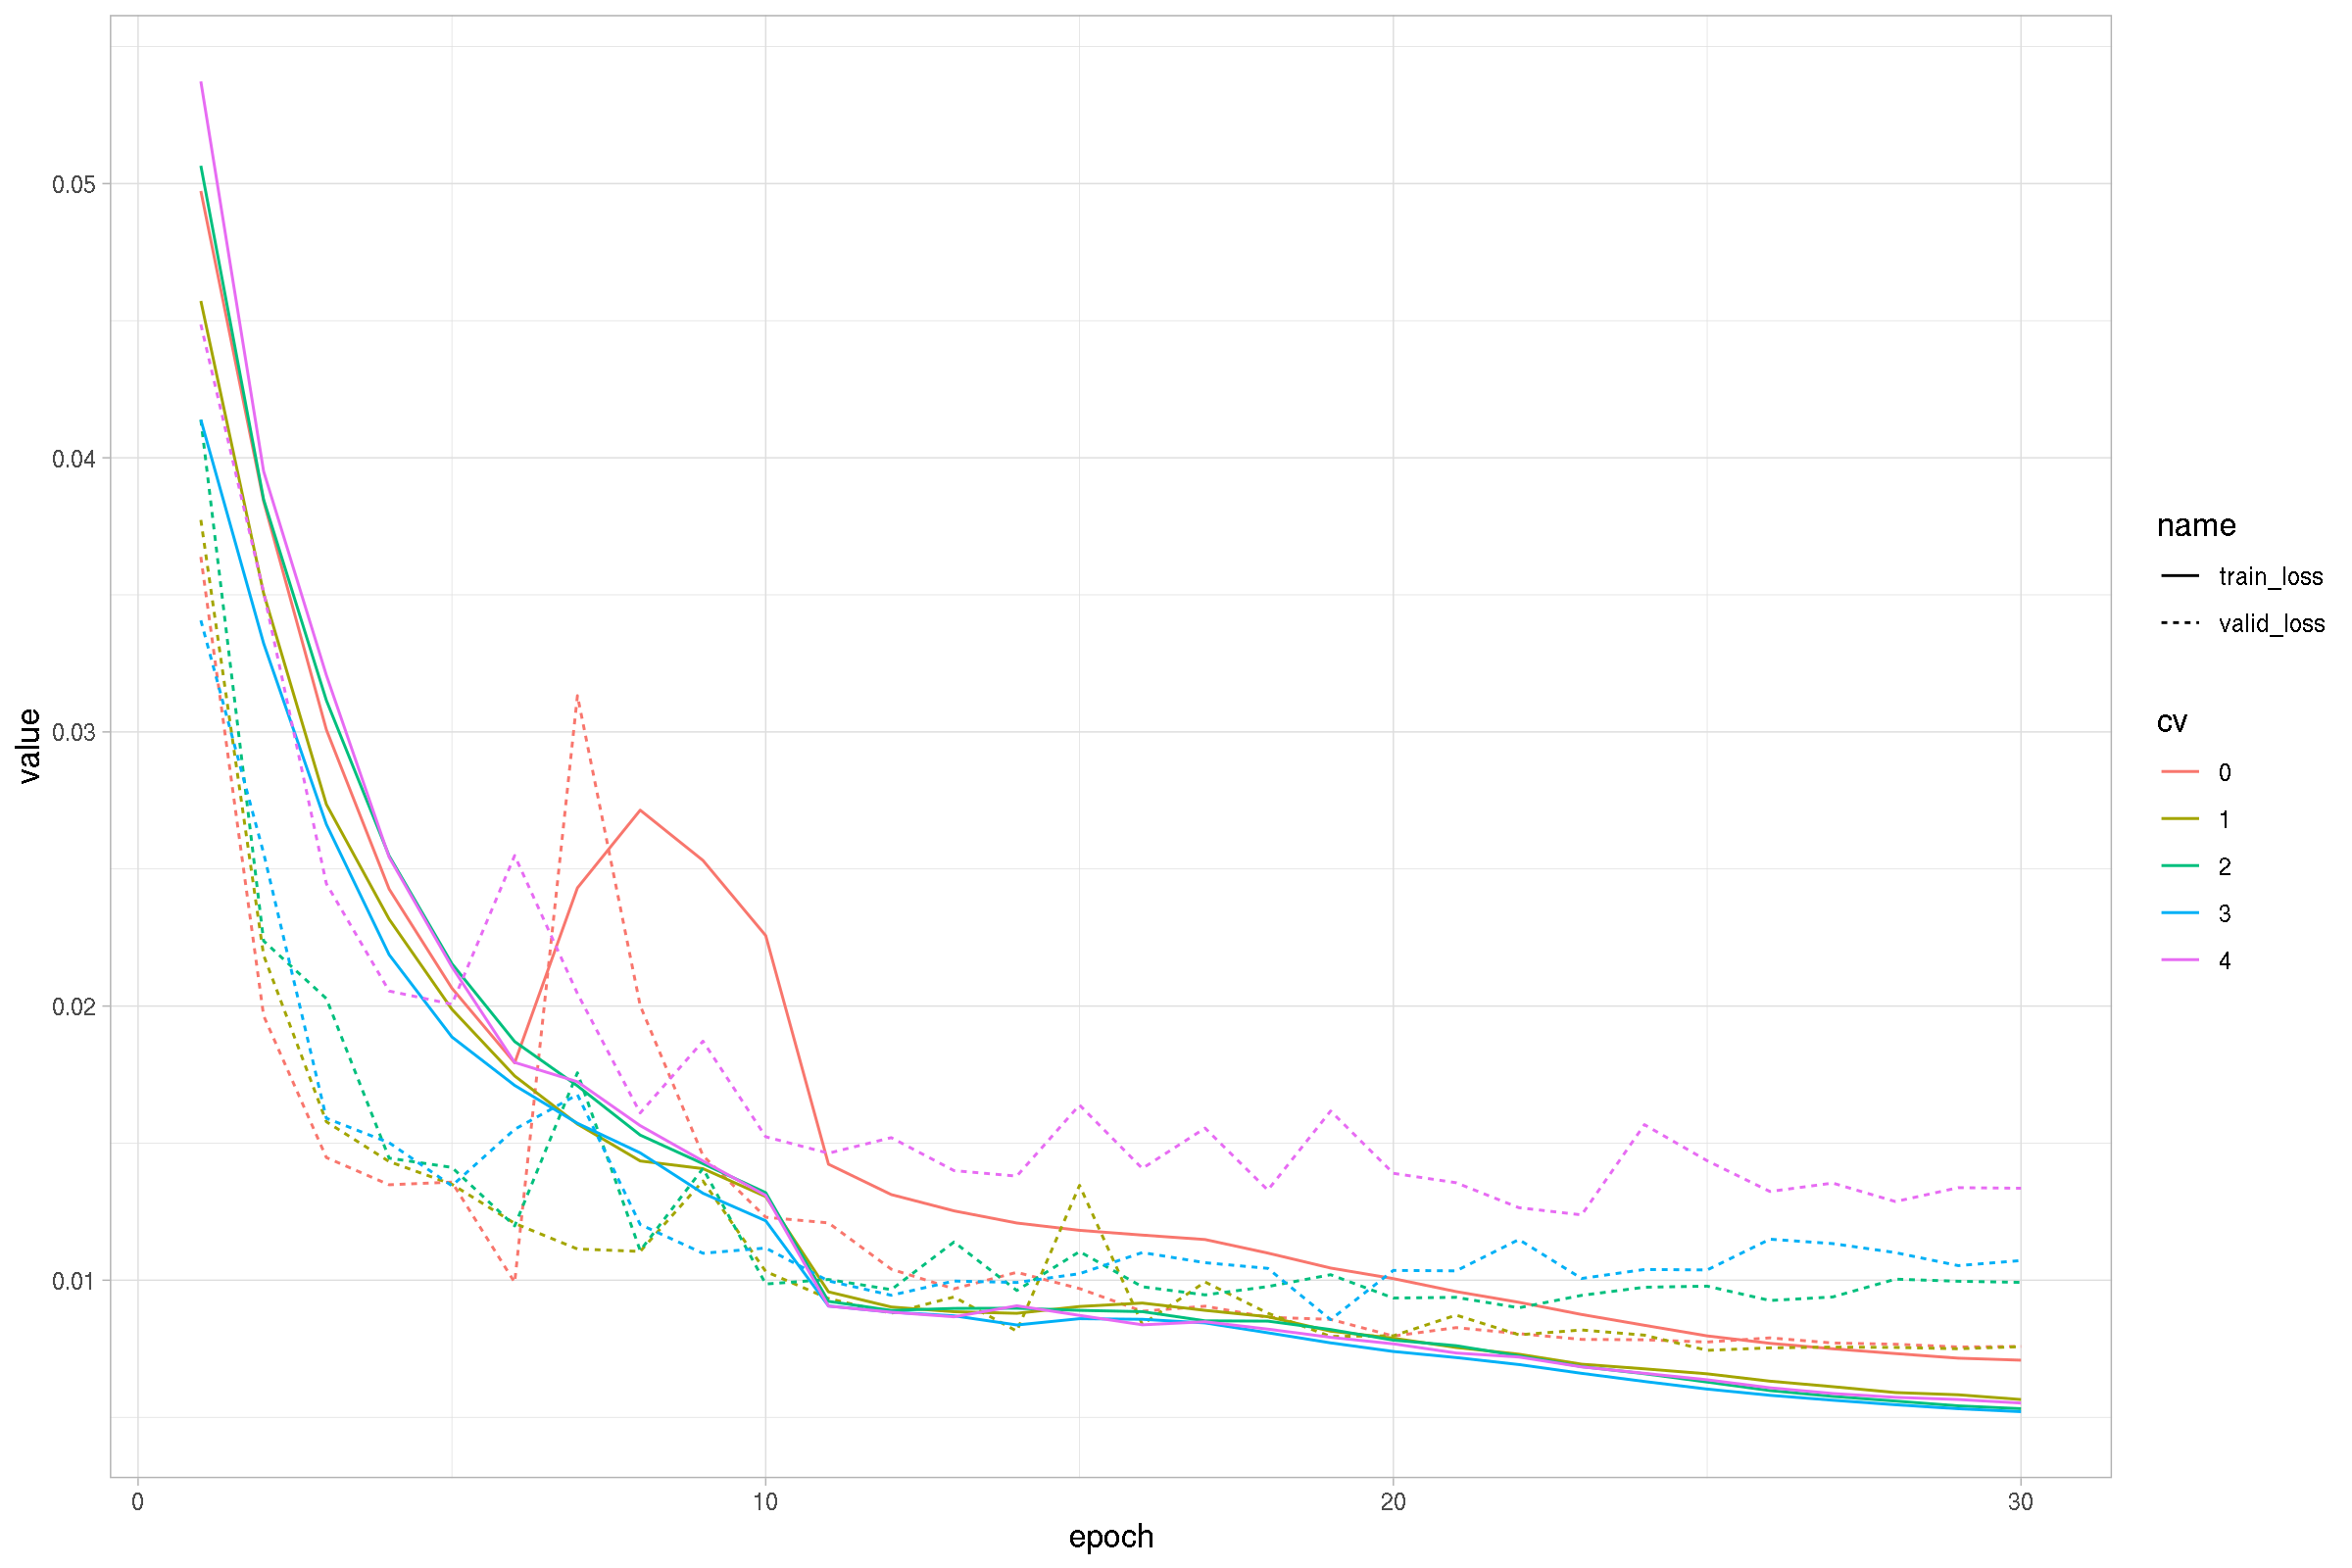

In [17]:
data %>%
    filter(run == "multi_patho.35") %>%
    pivot_longer(contains("loss")) %>%
    ggplot(aes(epoch,value,color=cv,lty=name)) +
        geom_line()

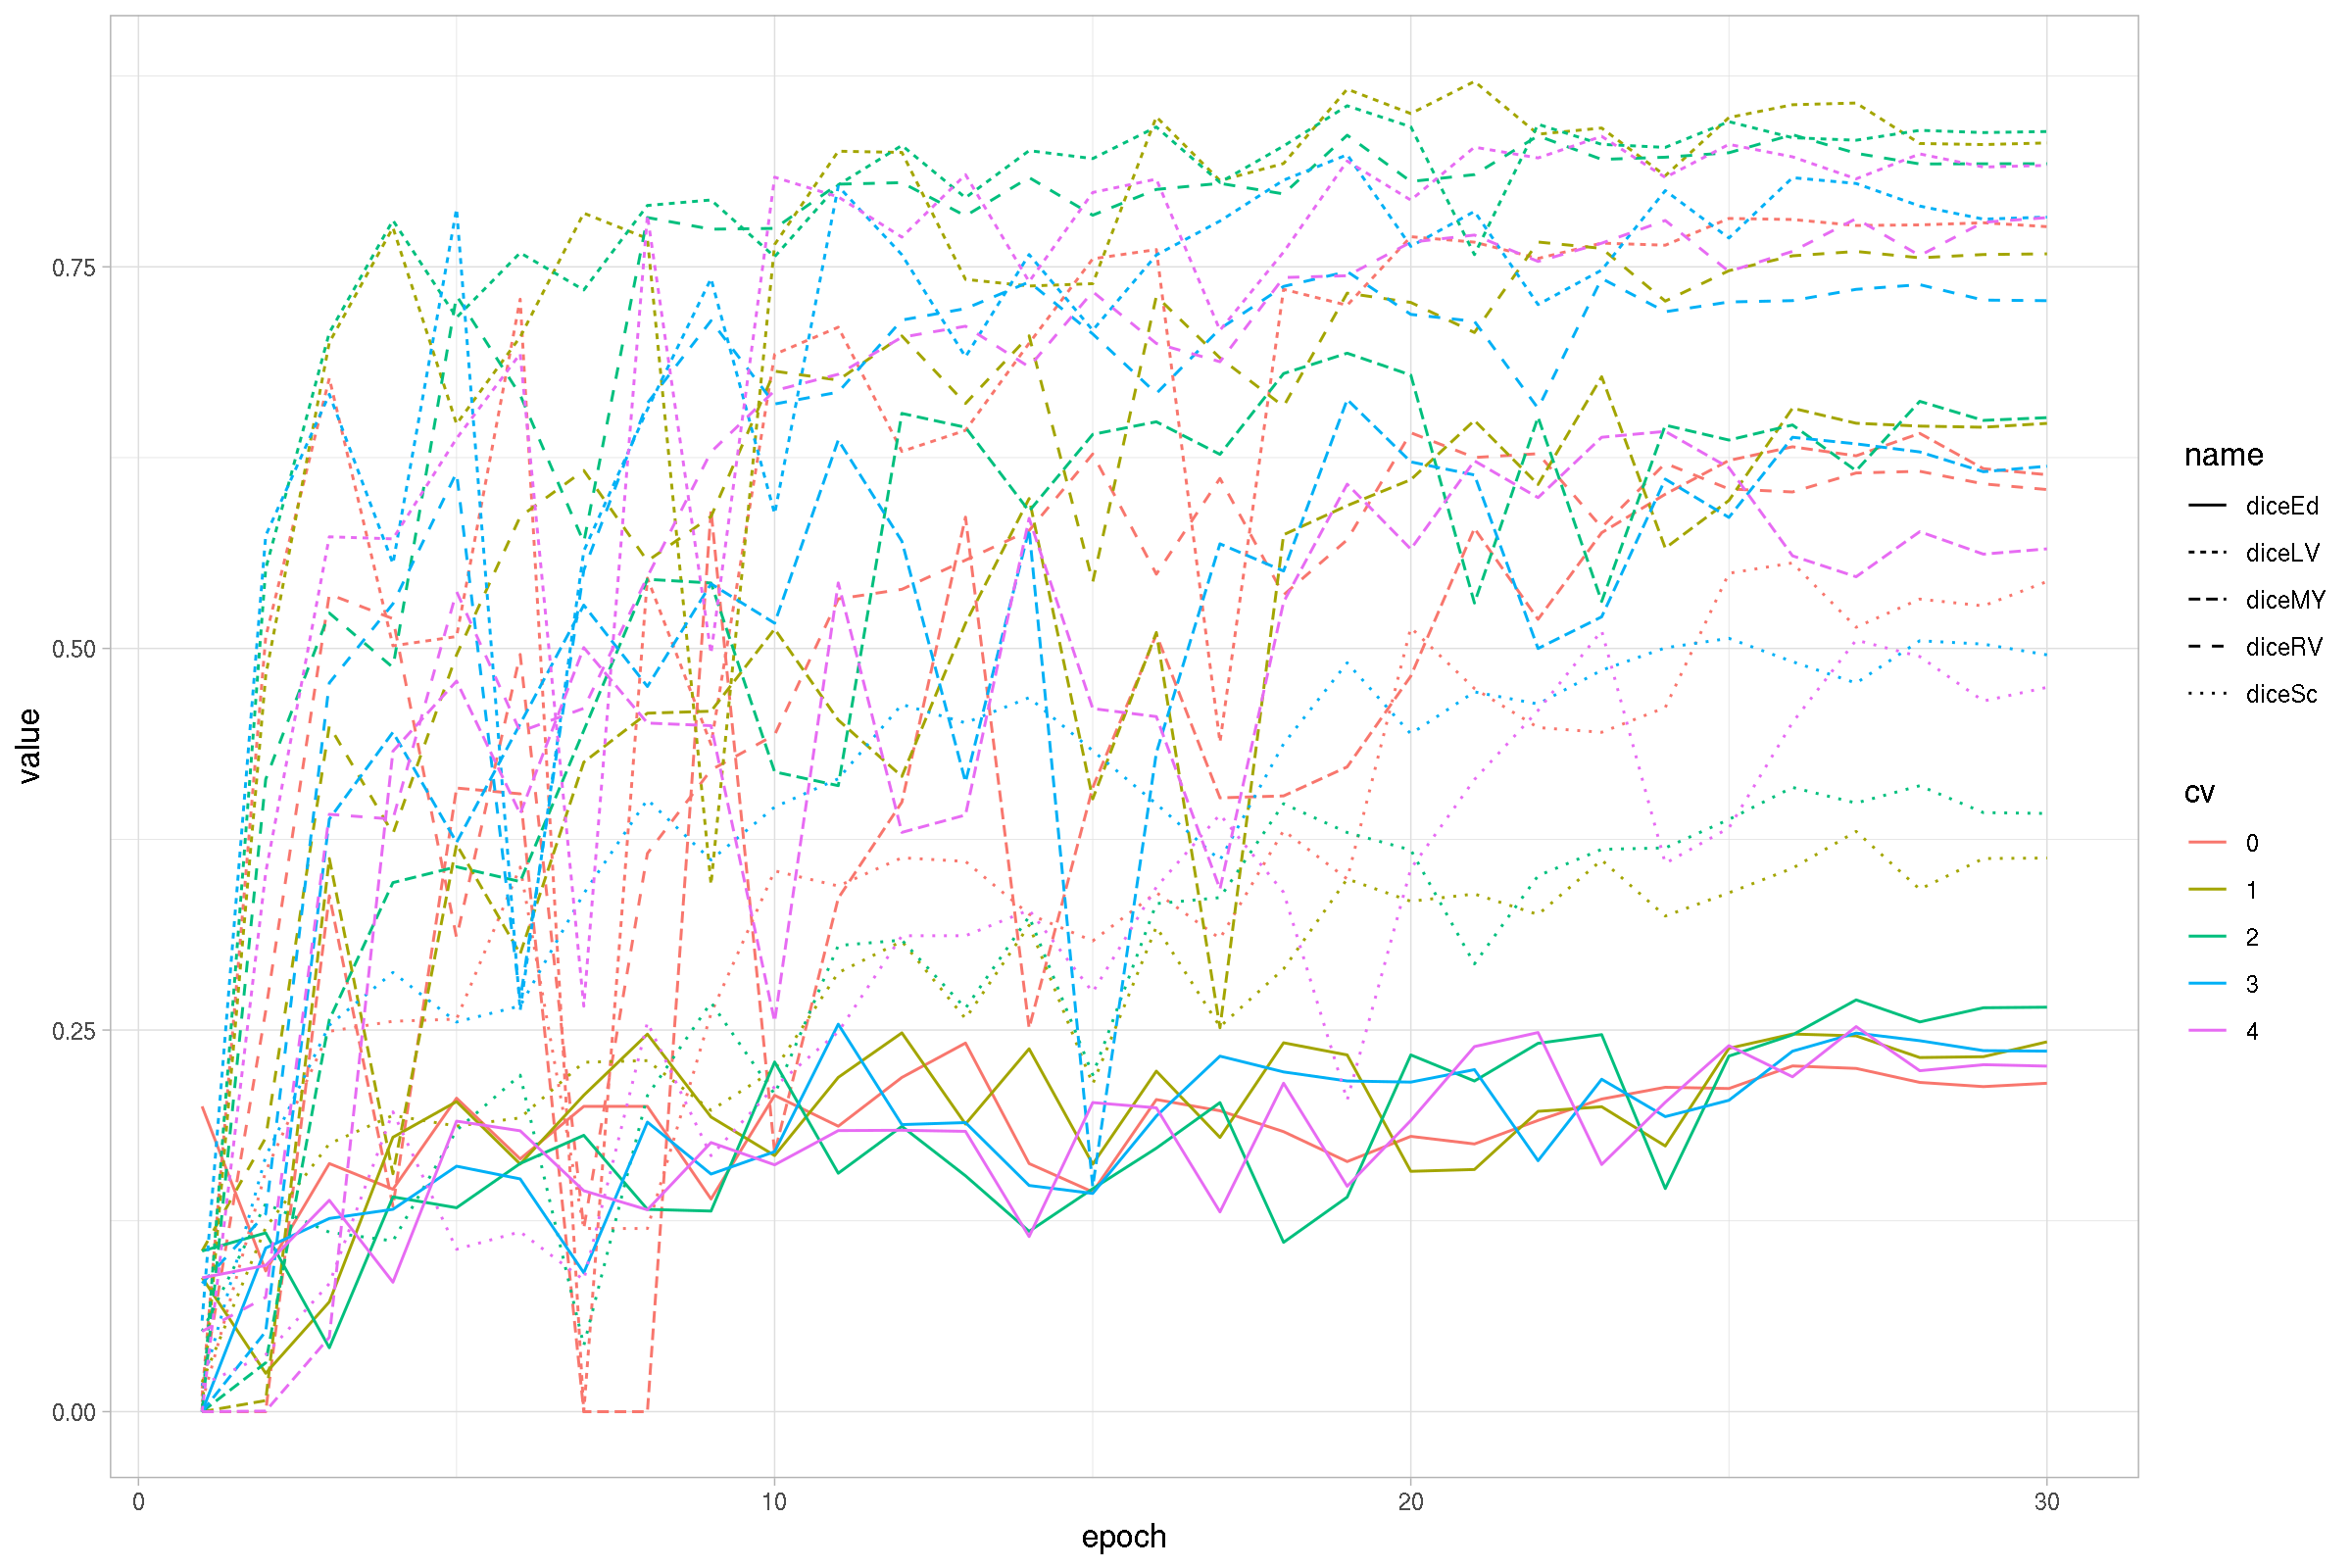

In [18]:
data %>%
    filter(run == "multi_patho.35") %>%
    pivot_longer(contains("dice")) %>%
    ggplot(aes(epoch,value,color=cv,lty=name)) +
        geom_line()

## Longer training

In [19]:
multi_long <- read_csv("../logs_20_40/combined_multi.csv") %>%
    separate(run, c("in","focus","cv"), "_", remove=FALSE) %>%
    separate(focus, c("focus","weight"), "\\.", fill = "right") %>%
    mutate(cv = str_remove(cv, "cv"), run = str_remove(run, "_cv."))
lge_long <- read_csv("../logs_20_40/combined_lge.csv") %>%
    separate(run, c("in","focus","cv"), "_", remove=FALSE) %>%
    separate(focus, c("focus","weight"), "\\.", fill = "right") %>%
    mutate(cv = str_remove(cv, "cv"), run = str_remove(run, "_cv.")) %>%
    rename(diceSc = diceFG)
t2_long <- read_csv("../logs_20_40/combined_t2.csv") %>%
    separate(run, c("in","focus","cv"), "_", remove=FALSE) %>%
    separate(focus, c("focus","weight"), "\\.", fill = "right") %>%
    mutate(cv = str_remove(cv, "cv"), run = str_remove(run, "_cv.")) %>%
    rename(diceEd = diceFG)
long <- bind_rows(multi_long,lge_long,t2_long)

Parsed with column specification:
cols(
  run = col_character(),
  epoch = col_double(),
  train_loss = col_double(),
  valid_loss = col_double(),
  foreground_acc = col_double(),
  diceLV = col_double(),
  diceMY = col_double(),
  diceRV = col_double(),
  diceEd = col_double(),
  diceSc = col_double(),
  time = col_time(format = "")
)

Parsed with column specification:
cols(
  run = col_character(),
  epoch = col_double(),
  train_loss = col_double(),
  valid_loss = col_double(),
  foreground_acc = col_double(),
  diceFG = col_double(),
  time = col_time(format = "")
)

Parsed with column specification:
cols(
  run = col_character(),
  epoch = col_double(),
  train_loss = col_double(),
  valid_loss = col_double(),
  foreground_acc = col_double(),
  diceFG = col_double(),
  time = col_time(format = "")
)



In [20]:
long

run            in    focus     weight cv  epoch train_loss  valid_loss 
1    multi_ce       multi ce        NA     0    1    0.9819551   0.6118782  
2    multi_ce       multi ce        NA     0    2    0.6764400   0.3797100  
3    multi_ce       multi ce        NA     0    3    0.5347855   0.2771505  
4    multi_ce       multi ce        NA     0    4    0.4346019   0.2839430  
5    multi_ce       multi ce        NA     0    5    0.3723729   0.2031246  
6    multi_ce       multi ce        NA     0    6    0.3212776   0.2008199  
7    multi_ce       multi ce        NA     0    7    0.2863492   0.1812387  
8    multi_ce       multi ce        NA     0    8    0.2554004   0.1531941  
9    multi_ce       multi ce        NA     0    9    0.2266568   0.1613739  
10   multi_ce       multi ce        NA     0   10    0.2102192   0.1491719  
11   multi_ce       multi ce        NA     0   11    0.1972469   0.1856676  
12   multi_ce       multi ce        NA     0   12    0.1857093   0.1670075  
13   multi_ce       multi ce        NA     0   13    0.2423384   0.1923772  
14   multi_ce       multi ce        NA     0   14    0.2254081   0.1461056  
15   multi_ce       multi ce        NA     0   15    0.2045689   0.1356049  
16   multi_ce       multi ce        NA     0   16    0.1874135   0.1443812  
17   multi_ce       multi ce        NA     0   17    0.1751818   0.1364270  
18   multi_ce       multi ce        NA     0   18    0.1626125   0.1501551  
19   multi_ce       multi ce        NA     0   19    0.1538409   0.1218893  
20   multi_ce       multi ce        NA     0   20    0.1476849   0.1297517  
21   multi_ce       multi ce        NA     0   21    0.1198751   0.1229358  
22   multi_ce       multi ce        NA     0   22    0.1177230   0.1247119  
23   multi_ce       multi ce        NA     0   23    0.1164636   0.1189821  
24   multi_ce       multi ce        NA     0   24    0.1143881   0.1249271  
25   multi_ce       multi ce        NA     0   25    0.1149361   0.1191963  
26   multi_ce       multi ce        NA     0   26    0.1141443   0.1279429  
27   multi_ce       multi ce        NA     0   27    0.1124037   0.1150833  
28   multi_ce       multi ce        NA     0   28    0.1130538   0.1189526  
29   multi_ce       multi ce        NA     0   29    0.1122666   0.1177242  
30   multi_ce       multi ce        NA     0   30    0.1135189   0.1167791  
...  ...            ...   ...       ...    ... ...   ...         ...        
1771 t2_edemaOnly.8 t2    edemaOnly 8      4   31    0.002378156 0.006533385
1772 t2_edemaOnly.8 t2    edemaOnly 8      4   32    0.002416017 0.005006207
1773 t2_edemaOnly.8 t2    edemaOnly 8      4   33    0.002309792 0.005977009
1774 t2_edemaOnly.8 t2    edemaOnly 8      4   34    0.002224337 0.004345796
1775 t2_edemaOnly.8 t2    edemaOnly 8      4   35    0.002154968 0.007196763
1776 t2_edemaOnly.8 t2    edemaOnly 8      4   36    0.002112737 0.004747451
1777 t2_edemaOnly.8 t2    edemaOnly 8      4   37    0.002138077 0.004675994
1778 t2_edemaOnly.8 t2    edemaOnly 8      4   38    0.002063330 0.006147441
1779 t2_edemaOnly.8 t2    edemaOnly 8      4   39    0.001962153 0.004960076
1780 t2_edemaOnly.8 t2    edemaOnly 8      4   40    0.001963395 0.005554951
1781 t2_edemaOnly.8 t2    edemaOnly 8      4   41    0.001876522 0.006721060
1782 t2_edemaOnly.8 t2    edemaOnly 8      4   42    0.001917492 0.007147512
1783 t2_edemaOnly.8 t2    edemaOnly 8      4   43    0.001880601 0.005623873
1784 t2_edemaOnly.8 t2    edemaOnly 8      4   44    0.001838687 0.006196058
1785 t2_edemaOnly.8 t2    edemaOnly 8      4   45    0.001791661 0.005999102
1786 t2_edemaOnly.8 t2    edemaOnly 8      4   46    0.001780971 0.007062689
1787 t2_edemaOnly.8 t2    edemaOnly 8      4   47    0.001744097 0.007091739
1788 t2_edemaOnly.8 t2    edemaOnly 8      4   48    0.001726125 0.005950269
1789 t2_edemaOnly.8 t2    edemaOnly 8      4   49    0.001736735 0.006623222
1790 t2_edemaOnly.8 t2    edemaOnly 8      4   50    0.001712070 0.006825803
1

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 721 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 721 rows containing missing values (geom_point).”


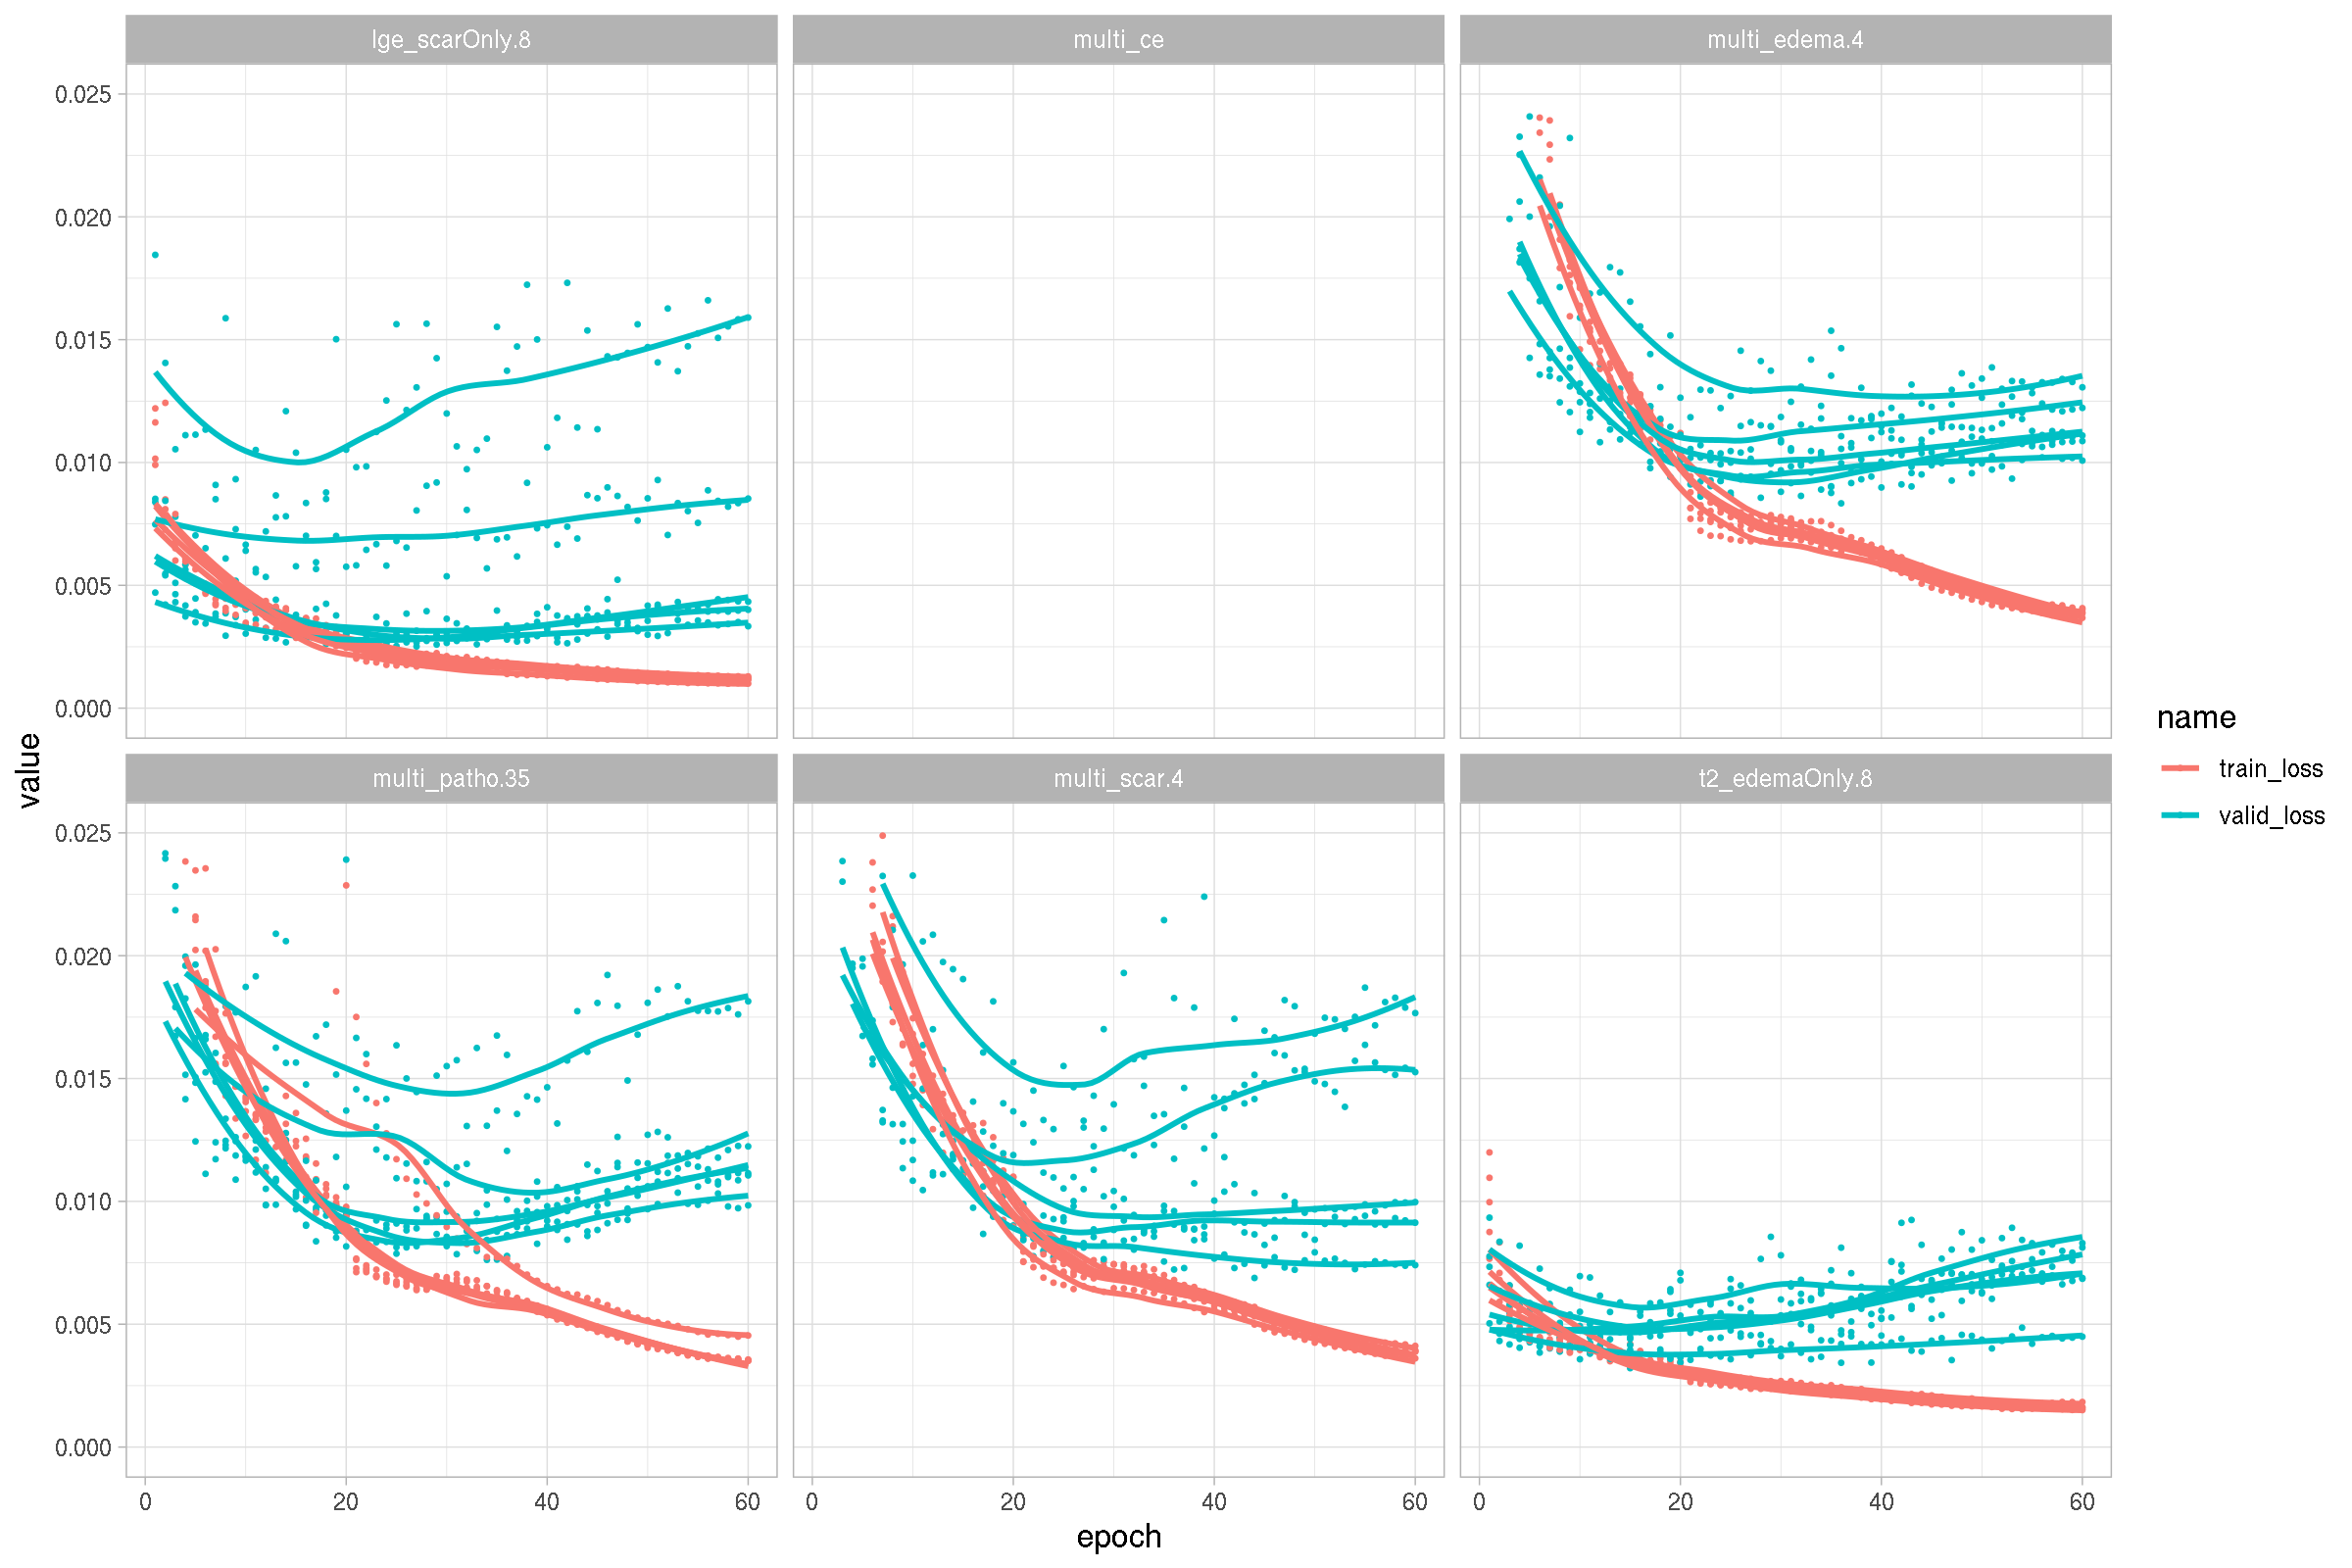

In [21]:
long %>%
    pivot_longer(contains("loss")) %>%
    #filter(focus != "ce", startsWith(run, "multi")) %>%
    ggplot(aes(epoch, value, pty=cv, color=name))+ #, shape=cv)) +
        geom_point(size=.5) +
        geom_smooth(se=F) +
        facet_wrap(.~run) +
        ylim(0,.025)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2400 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2400 rows containing missing values (geom_point).”


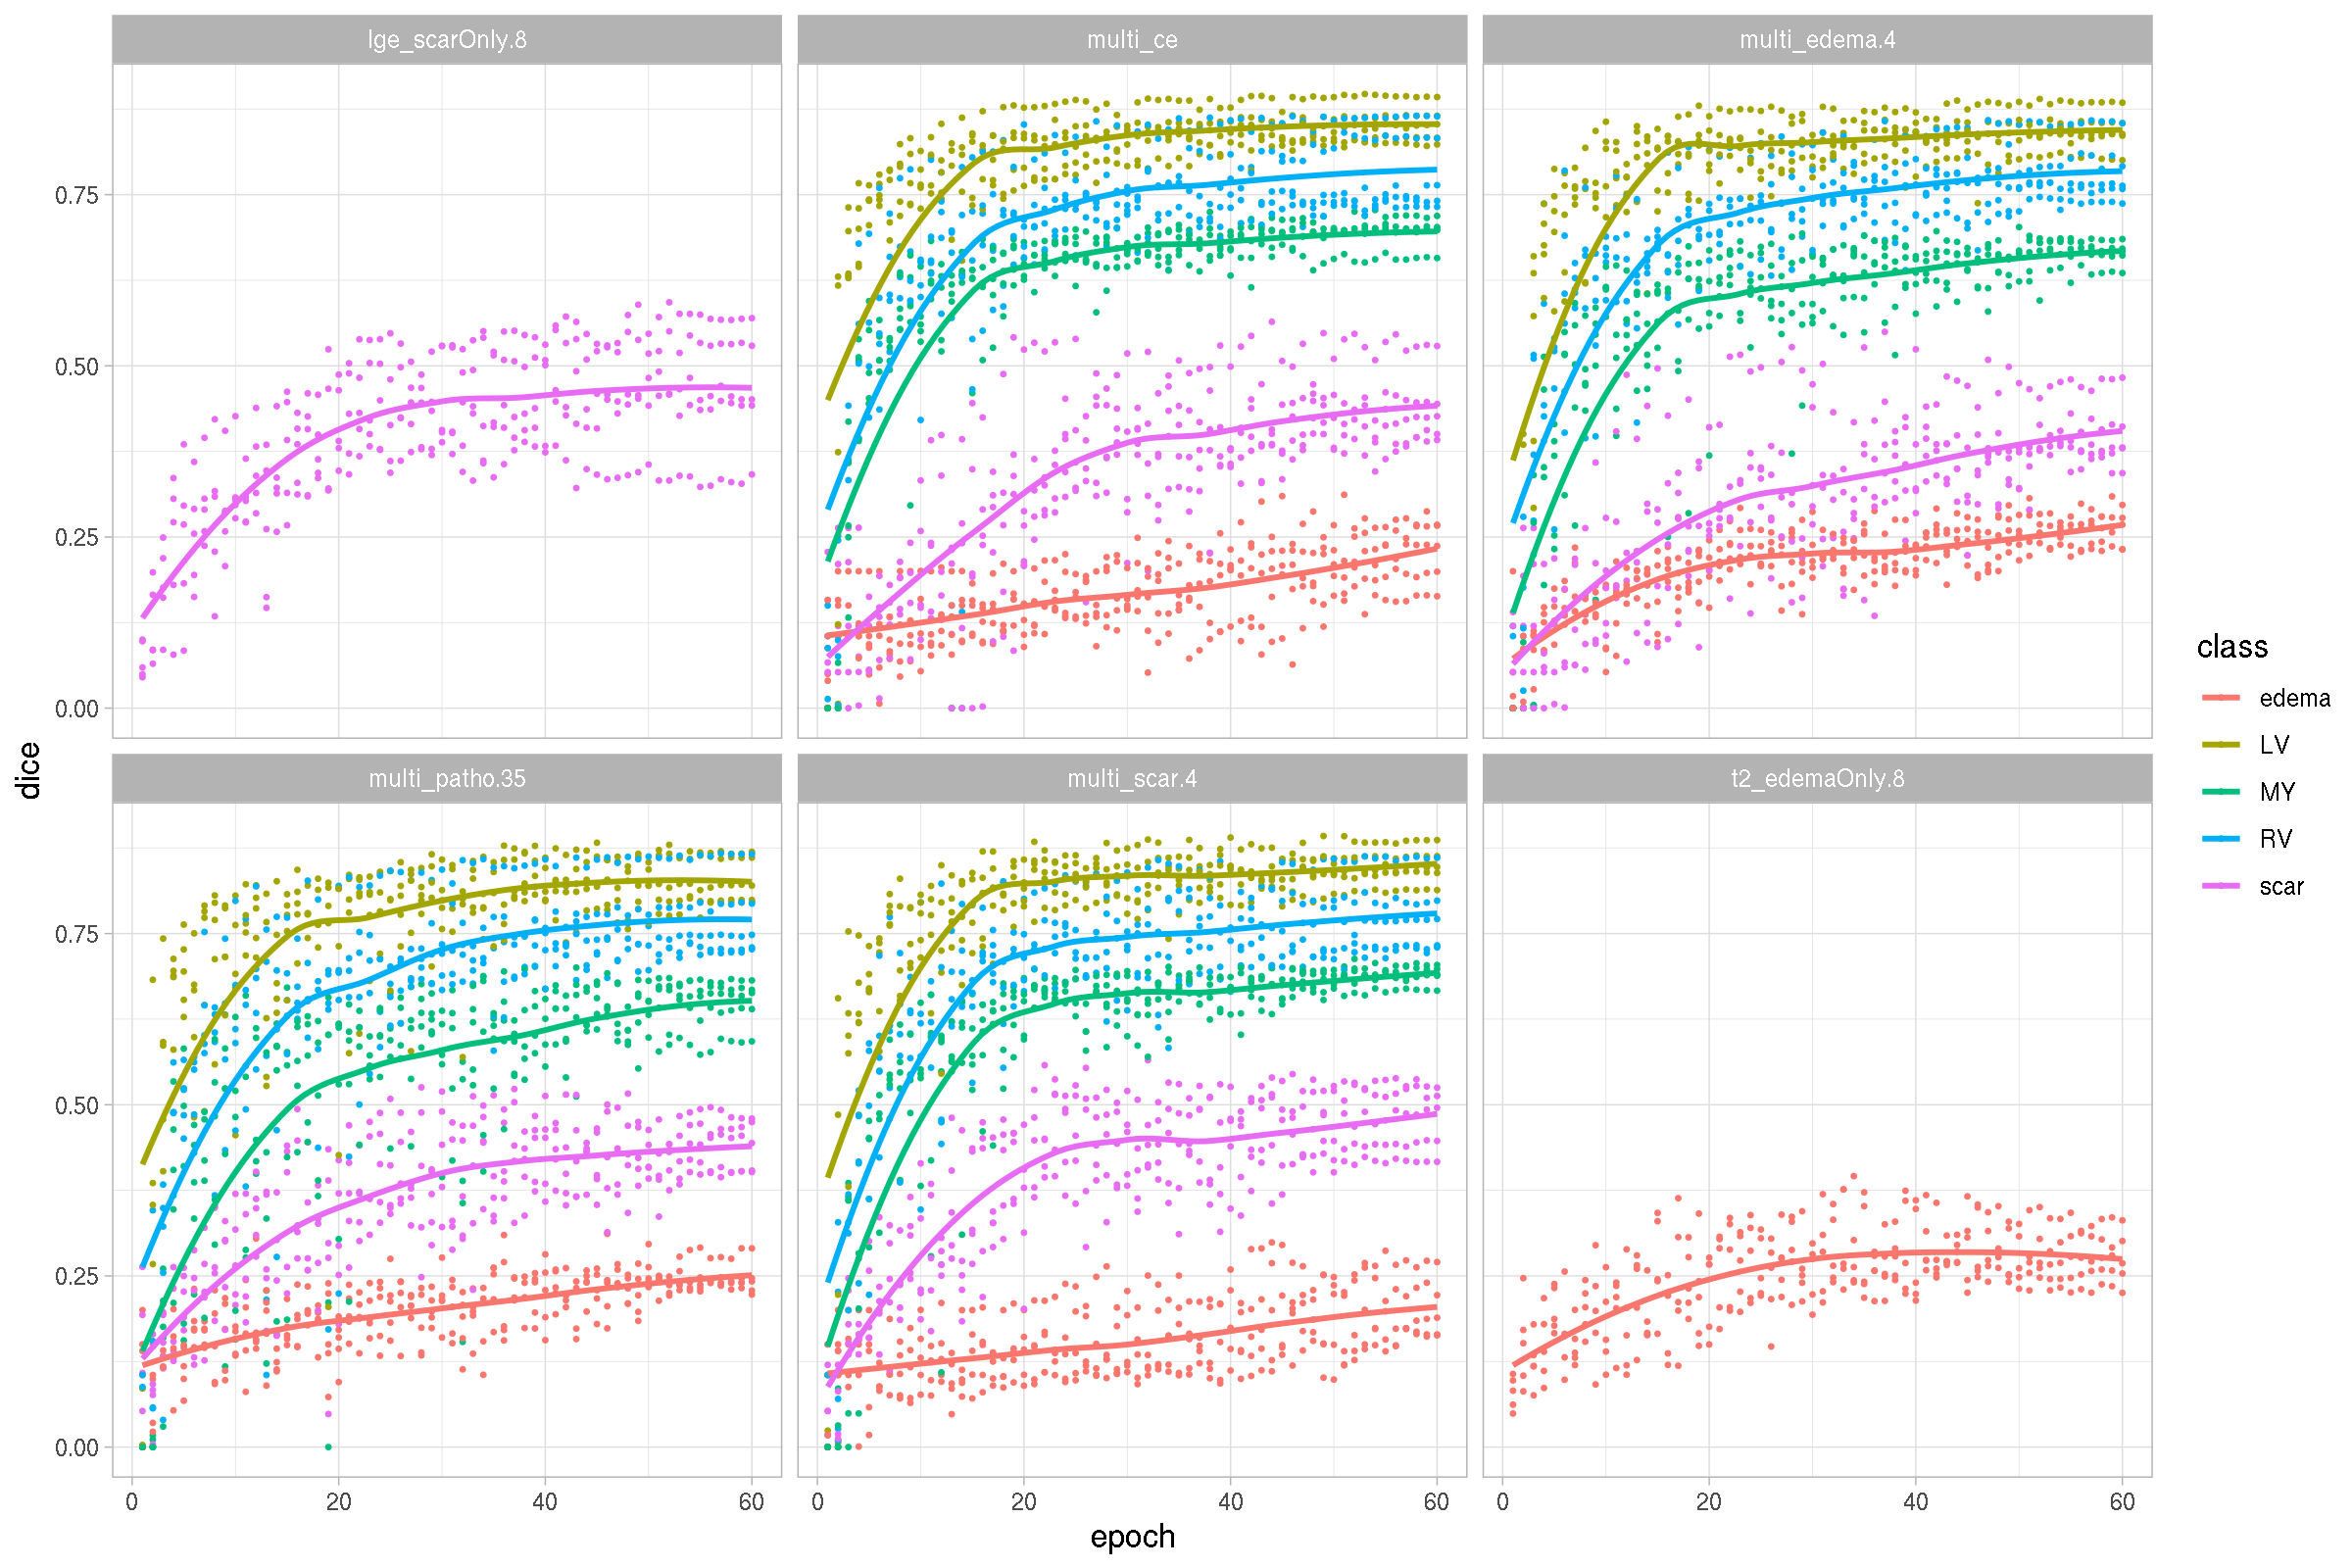

In [84]:
long %>%
    rename(diceedema=diceEd, dicescar=diceSc) %>%
    pivot_longer(contains("dice"), names_to="class", values_to="dice") %>%
    mutate(class=str_remove(class,'dice')) %>%
    ggplot(aes(epoch, dice, color=class))+ #, shape=cv)) +
        geom_point(size=.5) +
        #geom_line() +
        geom_smooth(se=FALSE) +
        facet_wrap(.~run)

In [85]:
ggsave('../docs/figures/long_training.svg')

Saving 6.67 x 6.67 in image

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2400 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2400 rows containing missing values (geom_point).”


In [23]:
long %>% filter(epoch==60)

run            in    focus     weight cv epoch train_loss  valid_loss 
1  multi_ce       multi ce        NA     0  60    0.066956460 0.119199269
2  multi_ce       multi ce        NA     1  60    0.062177032 0.107159451
3  multi_ce       multi ce        NA     2  60    0.058565732 0.144905135
4  multi_ce       multi ce        NA     3  60    0.076892011 0.143421009
5  multi_ce       multi ce        NA     4  60    0.057930030 0.172709182
6  multi_edema.4  multi edema     4      0  60    0.004070498 0.010872643
7  multi_edema.4  multi edema     4      1  60    0.003858574 0.010078475
8  multi_edema.4  multi edema     4      2  60    0.003904033 0.012222368
9  multi_edema.4  multi edema     4      3  60    0.004013872 0.011098961
10 multi_edema.4  multi edema     4      4  60    0.003676269 0.013060811
11 multi_patho.35 multi patho     35     0  60    0.003541263 0.011057288
12 multi_patho.35 multi patho     35     1  60    0.003509529 0.009838386
13 multi_patho.35 multi patho     35     2  60    0.003510793 0.011142375
14 multi_patho.35 multi patho     35     3  60    0.004540140 0.012237900
15 multi_patho.35 multi patho     35     4  60    0.003561488 0.018143201
16 multi_scar.4   multi scar      4      0  60    0.004117639 0.009132290
17 multi_scar.4   multi scar      4      1  60    0.003939393 0.007404782
18 multi_scar.4   multi scar      4      2  60    0.003881215 0.009970764
19 multi_scar.4   multi scar      4      3  60    0.003895206 0.015261723
20 multi_scar.4   multi scar      4      4  60    0.003610736 0.017664120
21 lge_scarOnly.8 lge   scarOnly  8      0  60    0.001292361 0.004335372
22 lge_scarOnly.8 lge   scarOnly  8      1  60    0.001156917 0.003335062
23 lge_scarOnly.8 lge   scarOnly  8      2  60    0.001237840 0.004005848
24 lge_scarOnly.8 lge   scarOnly  8      3  60    0.001181805 0.008530742
25 lge_scarOnly.8 lge   scarOnly  8      4  60    0.001000414 0.015899088
26 t2_edemaOnly.8 t2    edemaOnly 8      0  60    0.001833100 0.008300016
27 t2_edemaOnly.8 t2    edemaOnly 8      1  60    0.001505130 0.006881158
28 t2_edemaOnly.8 t2    edemaOnly 8      2  60    0.001607172 0.008122806
29 t2_edemaOnly.8 t2    edemaOnly 8      3  60    0.001624773 0.004493564
30 t2_edemaOnly.8 t2    edemaOnly 8      4  60    0.001548973 0.006850230
   foreground_acc diceLV    diceMY    diceRV    diceEd    diceSc    time    
1  0.7612393      0.8233302 0.7189728 0.7409239 0.2369635 0.5288851 00:10:00
2  0.7917811      0.8925912 0.7026924 0.7638178 0.2665551 0.4263457 00:10:00
3  0.7876413      0.8651190 0.6998410 0.8643739 0.1635020 0.3916597 00:10:00
4  0.7525722      0.8528082 0.6979467 0.7322684 0.1993229 0.4442352 00:10:00
5  0.7257162      0.8329895 0.6574081 0.8323814 0.2678661 0.4003064 00:10:00
6  0.7309593      0.8003189 0.6612217 0.7370550 0.2322529 0.4826714 00:10:00
7  0.7843297      0.8843647 0.6850857 0.7630162 0.2967888 0.3807247 00:09:00
8  0.7629205      0.8545653 0.6670069 0.8543492 0.2779063 0.3432772 00:09:00
9  0.7328088      0.8386211 0.6712105 0.7584402 0.2317656 0.4112479 00:09:00
10 0.7047169      0.8361821 0.6355858 0.7914791 0.2680433 0.3797407 00:10:00
11 0.7399115      0.7965526 0.6815059 0.7296710 0.2901872 0.4746131 00:09:00
12 0.7744145      0.8692892 0.6632259 0.7480661 0.2285382 0.4016671 00:10:00
13 0.7669879      0.8608333 0.6676931 0.8659707 0.2227066 0.4038137 00:09:00
14 0.7168576      0.7990159 0.6396343 0.7270688 0.2464310 0.4797253 00:09:00
15 0.6786967      0.8200188 0.5924996 0.7937349 0.2419177 0.4439846 00:09:00
16 0.7546530      0.8134623 0.7041801 0.7327577 0.2701257 0.5127728 00:10:00
17 0.7863721      0.8864671 0.6882913 0.7712015 0.1643968 0.4470768 00:09:00
18 0.7824568      0.8630148 0.6906225 0.8607340 0.1631626 0.4166063 00:09:00
19 0.7580616      0.8471602 0.6983308 0.7298354 0.2218408 0.5248948 00:09:00
20 0.7234985      0.8384553 0.6665763 0.7979844 0.1889566 0.4955876 00:09:00
21 0.5645806             NA        NA        NA        NA 0.5696539 00:19:00
22       NaN   

In [81]:
perf_long <- long %>% filter(epoch==60) %>% group_by(`in`,focus,weight) %>% summarise(across(starts_with("dice"), ~ mean(.x, na.rm = TRUE))) %>% mutate(meanScEd=(diceEd+diceSc)/2)
perf_long %>% mutate_if(is.numeric, round, 3)

`summarise()` regrouping output by 'in', 'focus' (override with `.groups` argument)

`mutate_if()` ignored the following grouping variables:
Columns `in`, `focus`



in    focus     weight diceLV diceMY diceRV diceEd diceSc meanScEd
1 lge   scarOnly  8        NaN    NaN    NaN    NaN  0.467    NaN   
2 multi ce        NA     0.853  0.695  0.787  0.227  0.438  0.333   
3 multi edema     4      0.843  0.664  0.781  0.261  0.400  0.330   
4 multi patho     35     0.829  0.649  0.773  0.246  0.441  0.343   
5 multi scar      4      0.850  0.690  0.779  0.202  0.479  0.341   
6 t2    edemaOnly 8        NaN    NaN    NaN  0.276    NaN    NaN

Previous performance for comparison:

In [25]:
perf_old <- perf %>% filter(str_c(`in`,focus,weight) %in% (perf_long %>% mutate(bla = str_c(`in`,focus,weight)) %>% pull(bla))) %>% filter(focus != 'balanced')
perf_old

in    focus     weight diceLV    diceMY    diceRV    diceEd    diceSc   
1 lge   scarOnly  8            NaN       NaN       NaN       NaN 0.4529517
2 multi ce        NA     0.8552887 0.6959196 0.7826109 0.1924488 0.4285691
3 multi edema     4      0.8382191 0.6535994 0.7662371 0.2475796 0.3503787
4 multi patho     35     0.8090096 0.6194050 0.7380192 0.2369942 0.4537339
5 multi scar      4      0.8396950 0.6736010 0.7721655 0.1690721 0.4562239
6 t2    edemaOnly 8            NaN       NaN       NaN 0.2781048       NaN

In [26]:
perf_diff <- bind_cols(select(perf_long,`in`,focus,weight), (perf_long[,4:8] - perf_old[,4:8]) %>% mutate_all(round,3))
perf_diff

in    focus     weight diceLV diceMY diceRV diceEd diceSc
1 lge   scarOnly  8         NaN    NaN   NaN     NaN  0.014
2 multi ce        NA     -0.002 -0.001 0.004   0.034  0.010
3 multi edema     4       0.005  0.010 0.015   0.014  0.049
4 multi patho     35      0.020  0.030 0.035   0.009 -0.013
5 multi scar      4       0.010  0.016 0.006   0.033  0.023
6 t2    edemaOnly 8         NaN    NaN   NaN  -0.002    NaN

In [27]:
library(gt)

In [28]:
tmp_html <- perf_diff %>%
  ungroup %>%
  gt() %>%
  tab_header(
    title = "Performance difference",
    subtitle = "Long training (20+40) vs short training (10+20)"
  ) %>%
  fmt_percent(
    columns = starts_with("dice")
  ) %>%
  data_color(
    columns = starts_with("dice"),
    colors = scales::col_numeric("RdYlGn",domain=c(-.05,.05))
  ) %>%
  as_raw_html
IRdisplay::display_html(tmp_html)

<table style="font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen, Ubuntu, Cantarell, 'Helvetica Neue', 'Fira Sans', 'Droid Sans', Arial, sans-serif; display: table; border-collapse: collapse; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;">
 
 
 Performance difference 
 
 
 Long training (20+40) vs short training (10+20) 
 
 
 
 
 in 
 focus 
 weight 
 diceLV 
 diceMY 
 diceRV 
 diceEd 
 diceSc 
 
 
 
 
 lge 
 scarOnly 
 8 
 NaN 
 NaN 
 NaN 
 NaN 
 1.40% 
 
 
 multi 
 ce 
 NA 
 −0.20% 
 −0.10% 
 0.40% 
 3.40% 
 1.00% 
 
 
 multi 
 edema 
 4 
 0.50% 
 1.00% 
 1.50% 
 1.40% 
 4.90% 
 
 
 multi 
 patho 
 35 
 2.00% 
 3.00% 
 3.50% 
 0.90% 
 −1.30% 
 
 
 multi 
 scar 
 4 
 1.00% 
 1.60% 
 0.60% 
 3.30% 
 2.30% 
 
 
 t2 
 edemaOnly 
 8 
 NaN 
 NaN 
 NaN 
 −0.20% 
 NaN